# 부천과 서울 아파트 매매 가격 동향 분석

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import numpy as np

plt.rc('font', family = 'Malgun Gothic')
plt.rc('axes', unicode_minus = False)



%matplotlib inline

In [2]:
df_price = pd.read_csv(r'C:\Users\pjk\Documents\Data_set\Jupyter_data\한국부동산원_아파트 평균매매가격(월별)_20201029.csv', encoding = 'cp949')
df_first = pd.read_csv(r'C:\Users\pjk\Documents\Data_set\Jupyter_data\lecture_data\전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv', encoding = 'cp949')
df_last = pd.read_csv(r'C:\Users\pjk\Documents\Data_set\Jupyter_data\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20200430.csv', encoding = 'cp949')


In [370]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')


In [371]:
df_last.head()

지역명               규모구분    연도   월 분양가격(㎡)    분양가격   평당분양가격  지역  \
0  서울                 전체  2015  10    5841  5841.0  19275.3  서울   
1  서울         전용면적 60㎡이하  2015  10    5652  5652.0  18651.6  서울   
2  서울   전용면적 60㎡초과 85㎡이하  2015  10    5882  5882.0  19410.6  서울   
3  서울  전용면적 85㎡초과 102㎡이하  2015  10    5721  5721.0  18879.3  서울   
4  서울        전용면적 102㎡초과  2015  10    5879  5879.0  19400.7  서울   

                전용면적  
0                 전체  
1         전용면적 60㎡이하  
2   전용면적 60㎡초과 85㎡이하  
3  전용면적 85㎡초과 102㎡이하  
4        전용면적 102㎡초과

In [4]:
df_first = df_first.melt(id_vars = '지역', var_name = '기간', value_name = '평당분양가격')

In [5]:
def parse_year(date):
    year = date.split('년')[0]
    year = int(year)
    return year

def parse_month(date):
    month = date.split('년')[1].replace('월','')
    month = int(month)
    return month

In [6]:
df_first['연도']  = df_first['기간'].apply(parse_year)
df_first['월']  = df_first['기간'].apply(parse_month)

In [7]:
df_first_prepare = df_first.drop('기간', axis=1).copy()

In [8]:
df_last.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4675 entries, 0 to 4674
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   지역명      4675 non-null   object
 1   규모구분     4675 non-null   object
 2   연도       4675 non-null   int64 
 3   월        4675 non-null   int64 
 4   분양가격(㎡)  4346 non-null   object
dtypes: int64(2), object(3)
memory usage: 182.7+ KB


In [9]:
df_last['분양가격'] = pd.to_numeric(df_last['분양가격(㎡)'], errors = 'coerce')

In [10]:
df_last['평당분양가격'] = df_last['분양가격']*3.3
df_last['지역'] = df_last['지역명']
df_last['전용면적'] = df_last['규모구분']

In [11]:
cols = ['지역','연도','월','평당분양가격']
df_last_prepare = df_last.loc[
    df_last['전용면적'] == '전체', cols].copy()

In [12]:
df = pd.concat([df_first_prepare, df_last_prepare])

In [13]:
df = df[df.notnull()]
df

지역   평당분양가격    연도   월
0     서울  18189.0  2013  12
1     부산   8111.0  2013  12
2     대구   8080.0  2013  12
3     인천  10204.0  2013  12
4     광주   6098.0  2013  12
...   ..      ...   ...  ..
4650  전북   8259.9  2020   4
4655  전남   8550.3  2020   4
4660  경북   8807.7  2020   4
4665  경남  10404.9  2020   4
4670  제주  13480.5  2020   4

[1292 rows x 4 columns]

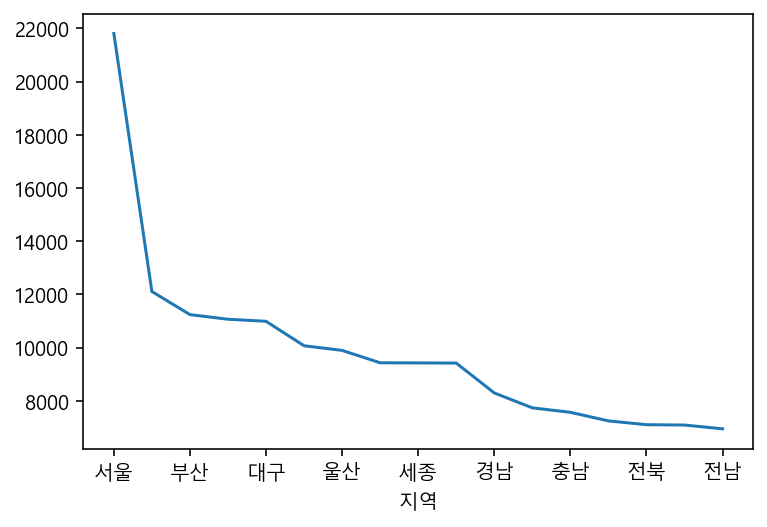

In [14]:
g = df.groupby(['지역'])['평당분양가격'].mean().sort_values(ascending=False)
g.plot()

p = pd.pivot_table(df, index = '연도', columns = '지역', values = '평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

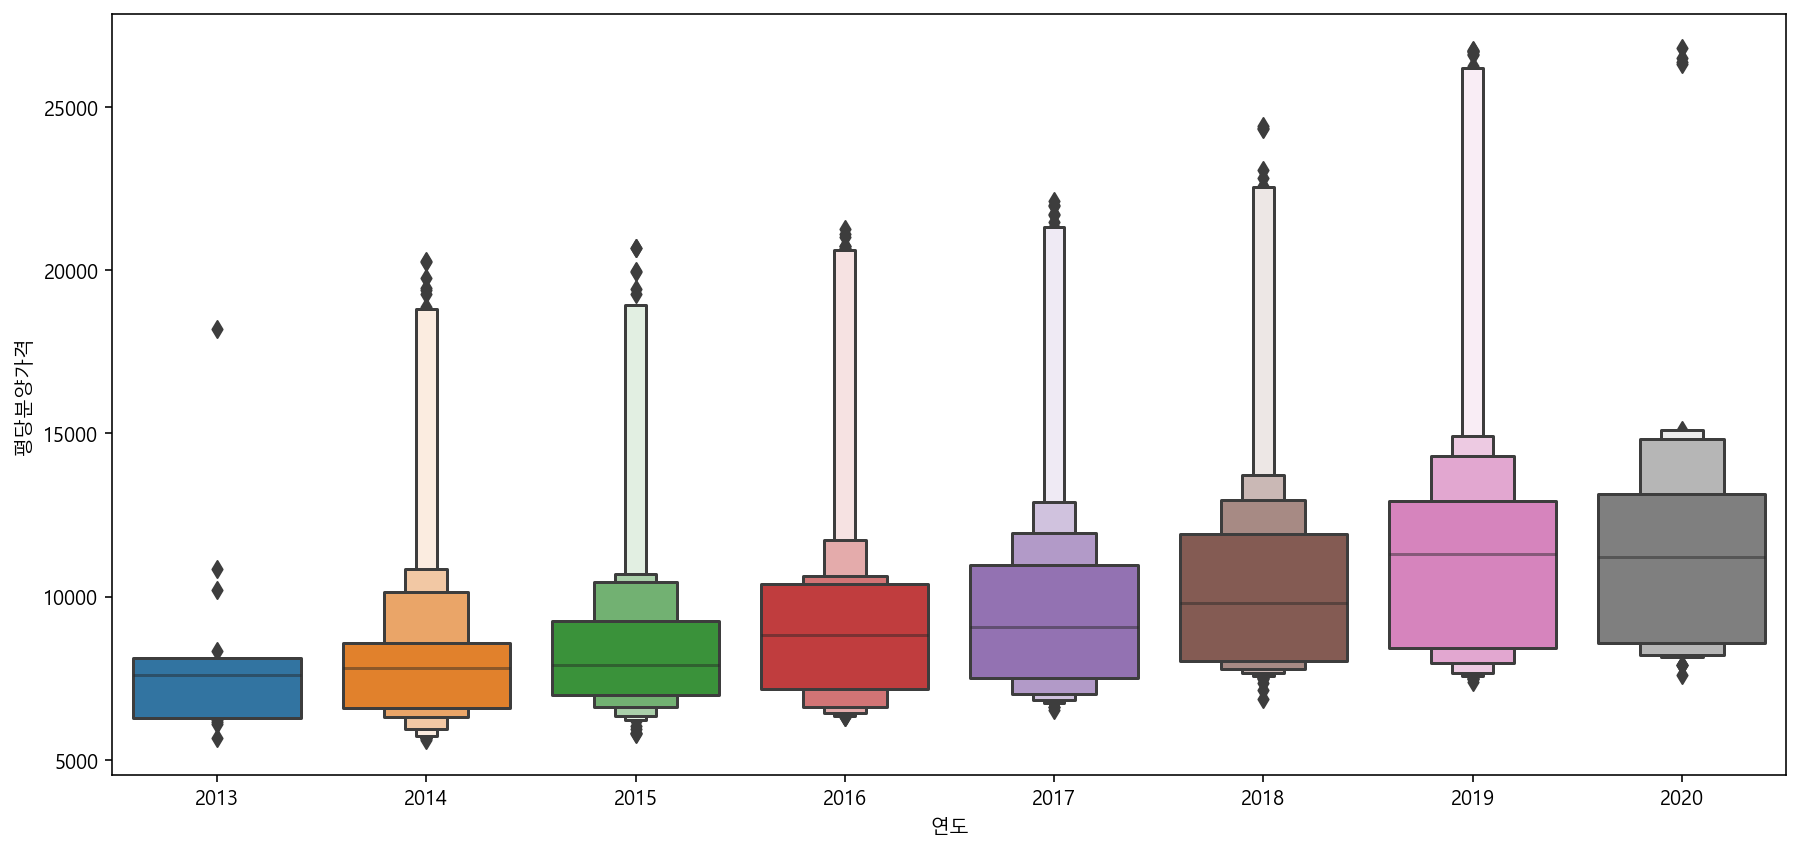

In [15]:
plt.figure(figsize=(15,7))
sns.boxenplot(data = df, x = '연도', y = '평당분양가격')

<AxesSubplot:xlabel='지역', ylabel='평당분양가격'>

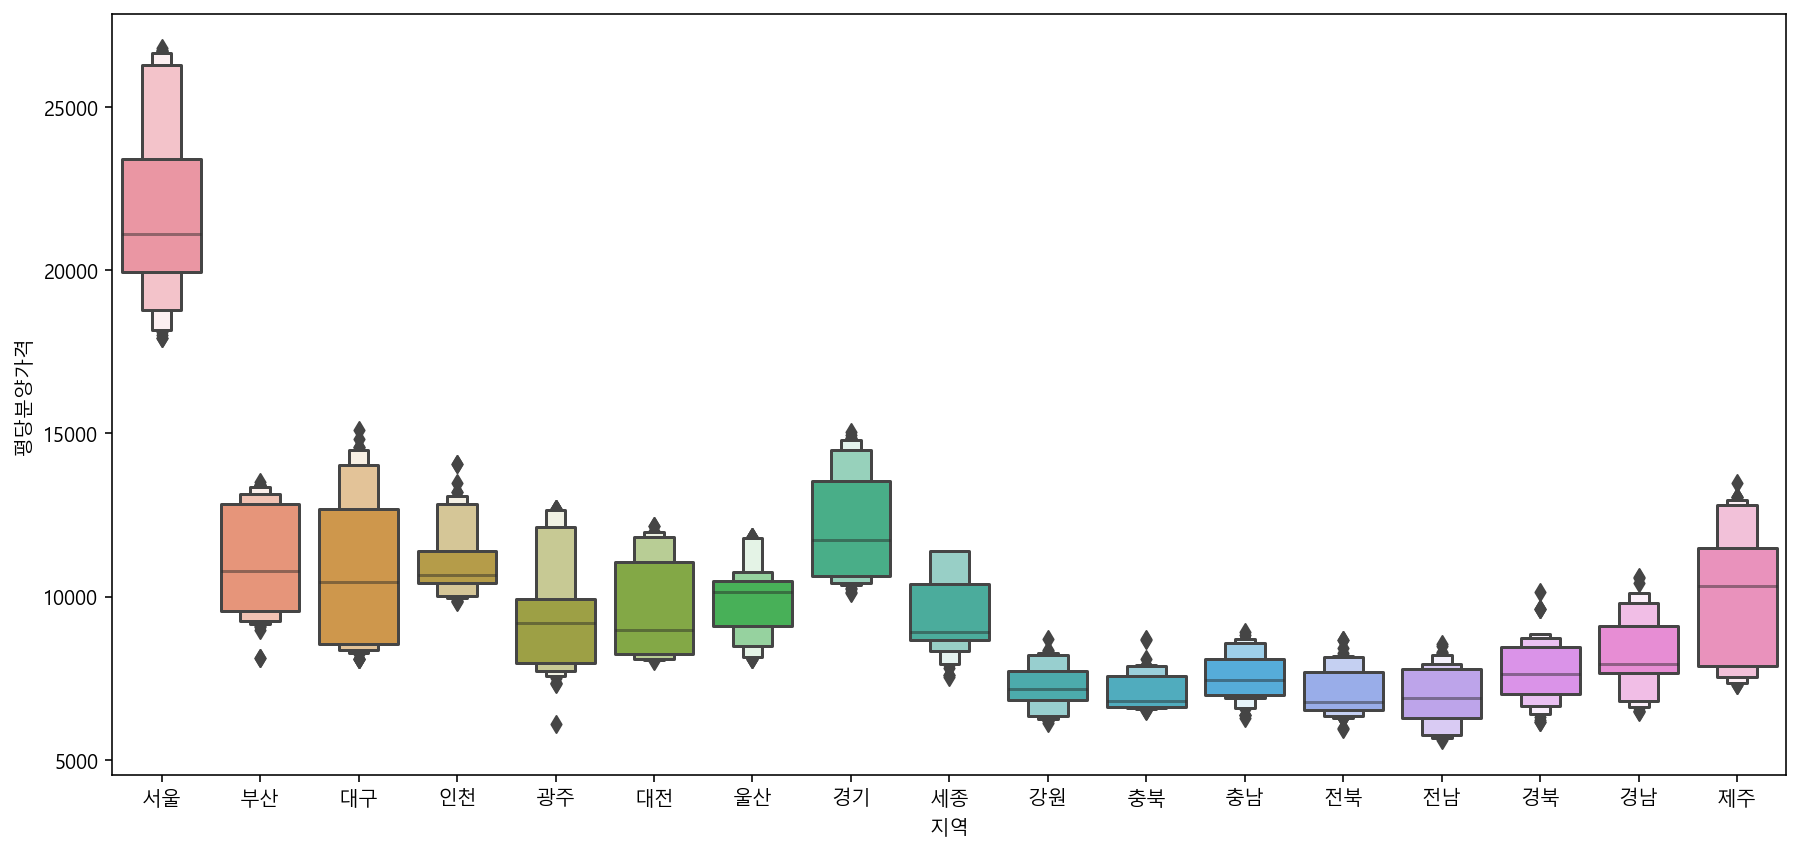

In [16]:
plt.figure(figsize=(15,7))
sns.boxenplot(data = df, x = '지역', y = '평당분양가격')

<AxesSubplot:xlabel='연도', ylabel='지역'>

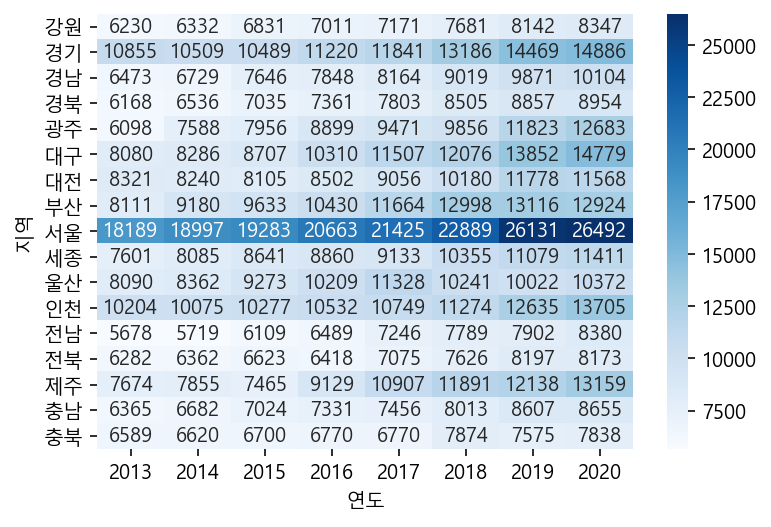

In [17]:
t = df.pivot_table(index = '지역', columns='연도', values='평당분양가격')
sns.heatmap(t, cmap="Blues", annot=True, fmt=".0f")

In [18]:
g = df.groupby(['연도','지역'])['평당분양가격'].mean().unstack().round()
g

지역        강원       경기       경남      경북       광주       대구       대전       부산  \
연도                                                                           
2013  6230.0  10855.0   6473.0  6168.0   6098.0   8080.0   8321.0   8111.0   
2014  6332.0  10509.0   6729.0  6536.0   7588.0   8286.0   8240.0   9180.0   
2015  6831.0  10489.0   7646.0  7035.0   7956.0   8707.0   8105.0   9633.0   
2016  7011.0  11220.0   7848.0  7361.0   8899.0  10310.0   8502.0  10430.0   
2017  7171.0  11841.0   8164.0  7803.0   9471.0  11507.0   9056.0  11664.0   
2018  7681.0  13186.0   9019.0  8505.0   9856.0  12076.0  10180.0  12998.0   
2019  8142.0  14469.0   9871.0  8857.0  11823.0  13852.0  11778.0  13116.0   
2020  8347.0  14886.0  10104.0  8954.0  12683.0  14779.0  11568.0  12924.0   

지역         서울       세종       울산       인천      전남      전북       제주      충남  \
연도                                                                          
2013  18189.0   7601.0   8090.0  10204.0  5678.0  6282.0   7674.0  6365.0   
2014  18997.0   8085.0   8362.0  10075.0  5719.0  6362.0   7855.0  6682.0   
2015  19283.0   8641.0   9273.0  10277.0  6109.0  6623.0   7465.0  7024.0   
2016  20663.0   8860.0  10209.0  10532.0  6489.0  6418.0   9129.0  7331.0   
2017  21425.0   9133.0  11328.0  10749.0  7246.0  7075.0  10907.0  7456.0   
2018  22889.0  10355.0  10241.0  11274.0  7789.0  7626.0  11891.0  8013.0   
2019  26131.0  11079.0  10022.0  12635.0  7902.0  8197.0  12138.0  8607.0   
2020  26492.0  11411.0  10372.0  13705.0  8380.0  8173.0  13159.0  8655.0   

지역        충북  
연도            
2013  6589.0  
2014  6620.0  
2015  6700.0  
2016  6770.0  
2017  6770.0  
2018  7874.0  
2019  7575.0  
2020  7838.0

<AxesSubplot:xlabel='연도', ylabel='지역'>

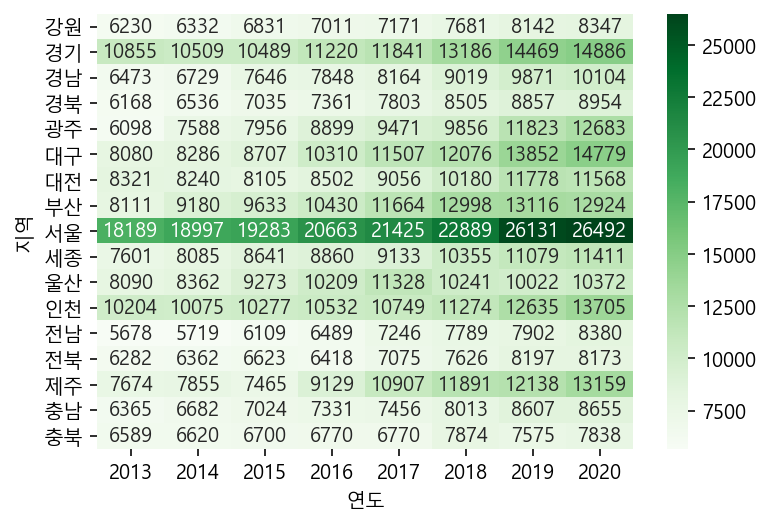

In [19]:
sns.heatmap(g.T, annot=True,fmt='.0f', cmap='Greens')

<AxesSubplot:>

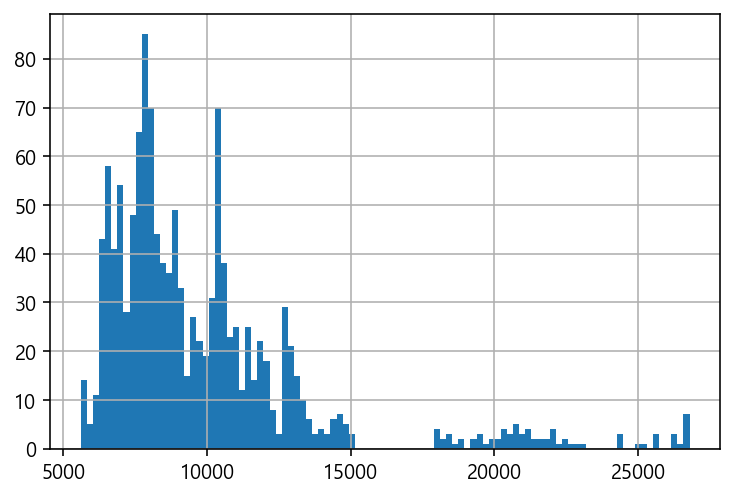

In [20]:
df['평당분양가격'].hist(bins=100)

In [21]:
price = df_last.loc[df_last['평당분양가격'].notnull(), '평당분양가격']

C:\Users\pjk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

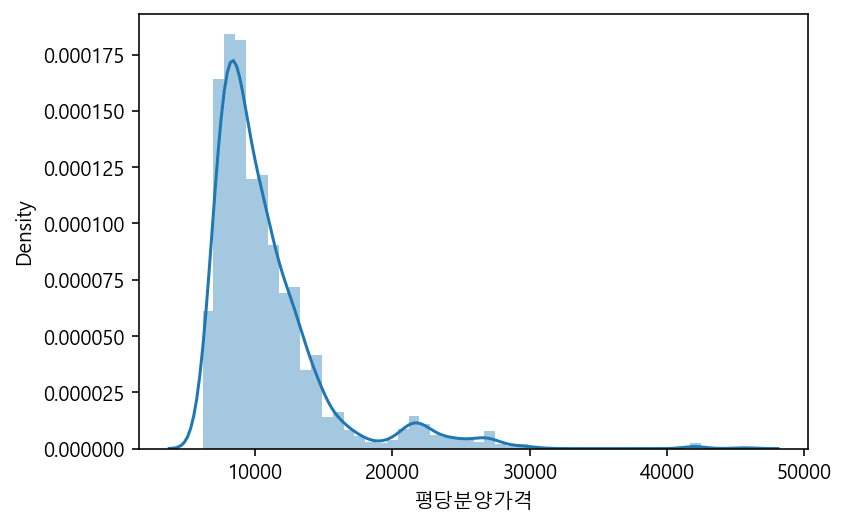

In [22]:
sns.distplot(price)

<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

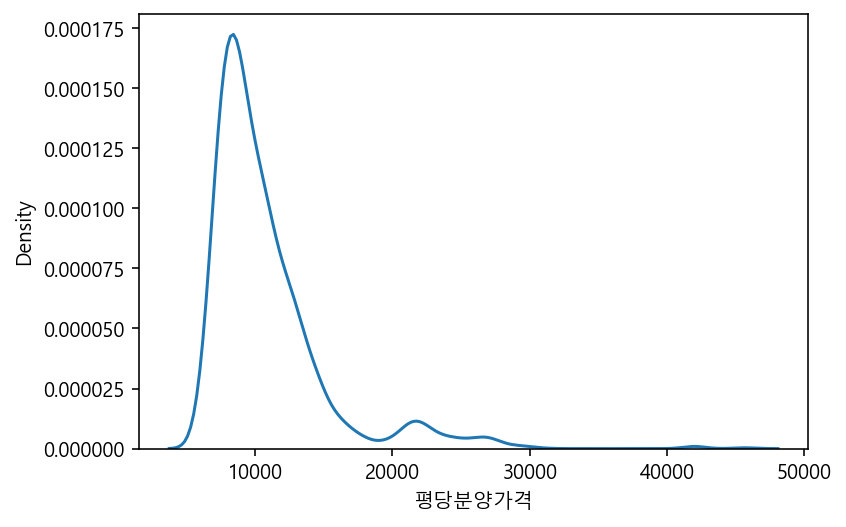

In [23]:
sns.kdeplot(price)

C:\Users\pjk\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\pjk\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='평당분양가격', ylabel='Density'>

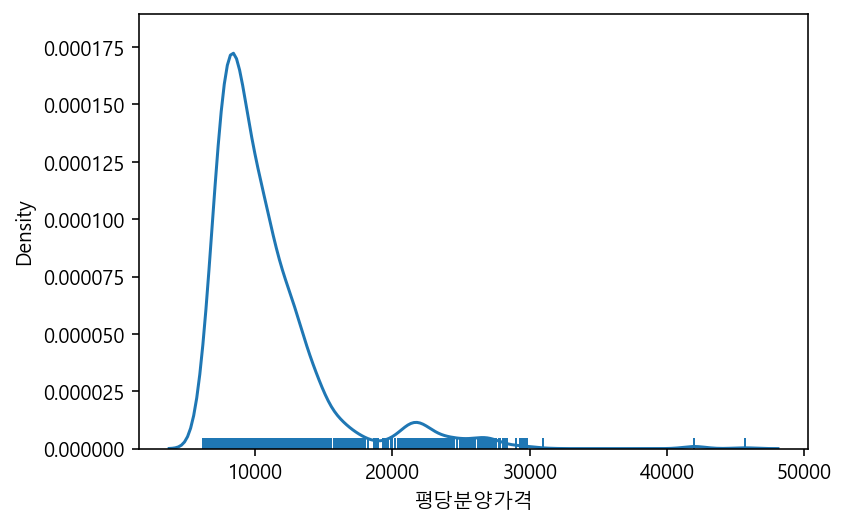

In [24]:
sns.distplot(price, hist=False, rug=True)

Text(0.5, 1.0, '연도별 전국 평균 평당 분양가격')

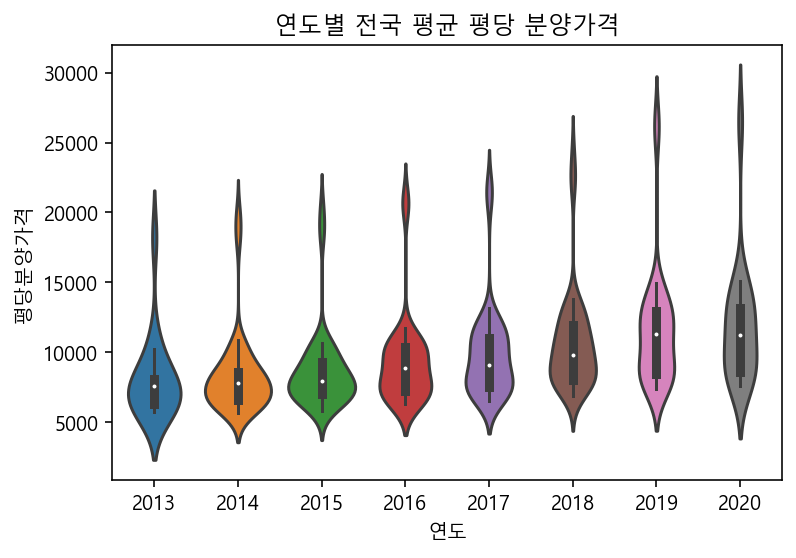

In [25]:
sns.violinplot(data=df, x='연도', y='평당분양가격').set_title('연도별 전국 평균 평당 분양가격')

<AxesSubplot:xlabel='연도', ylabel='평당분양가격'>

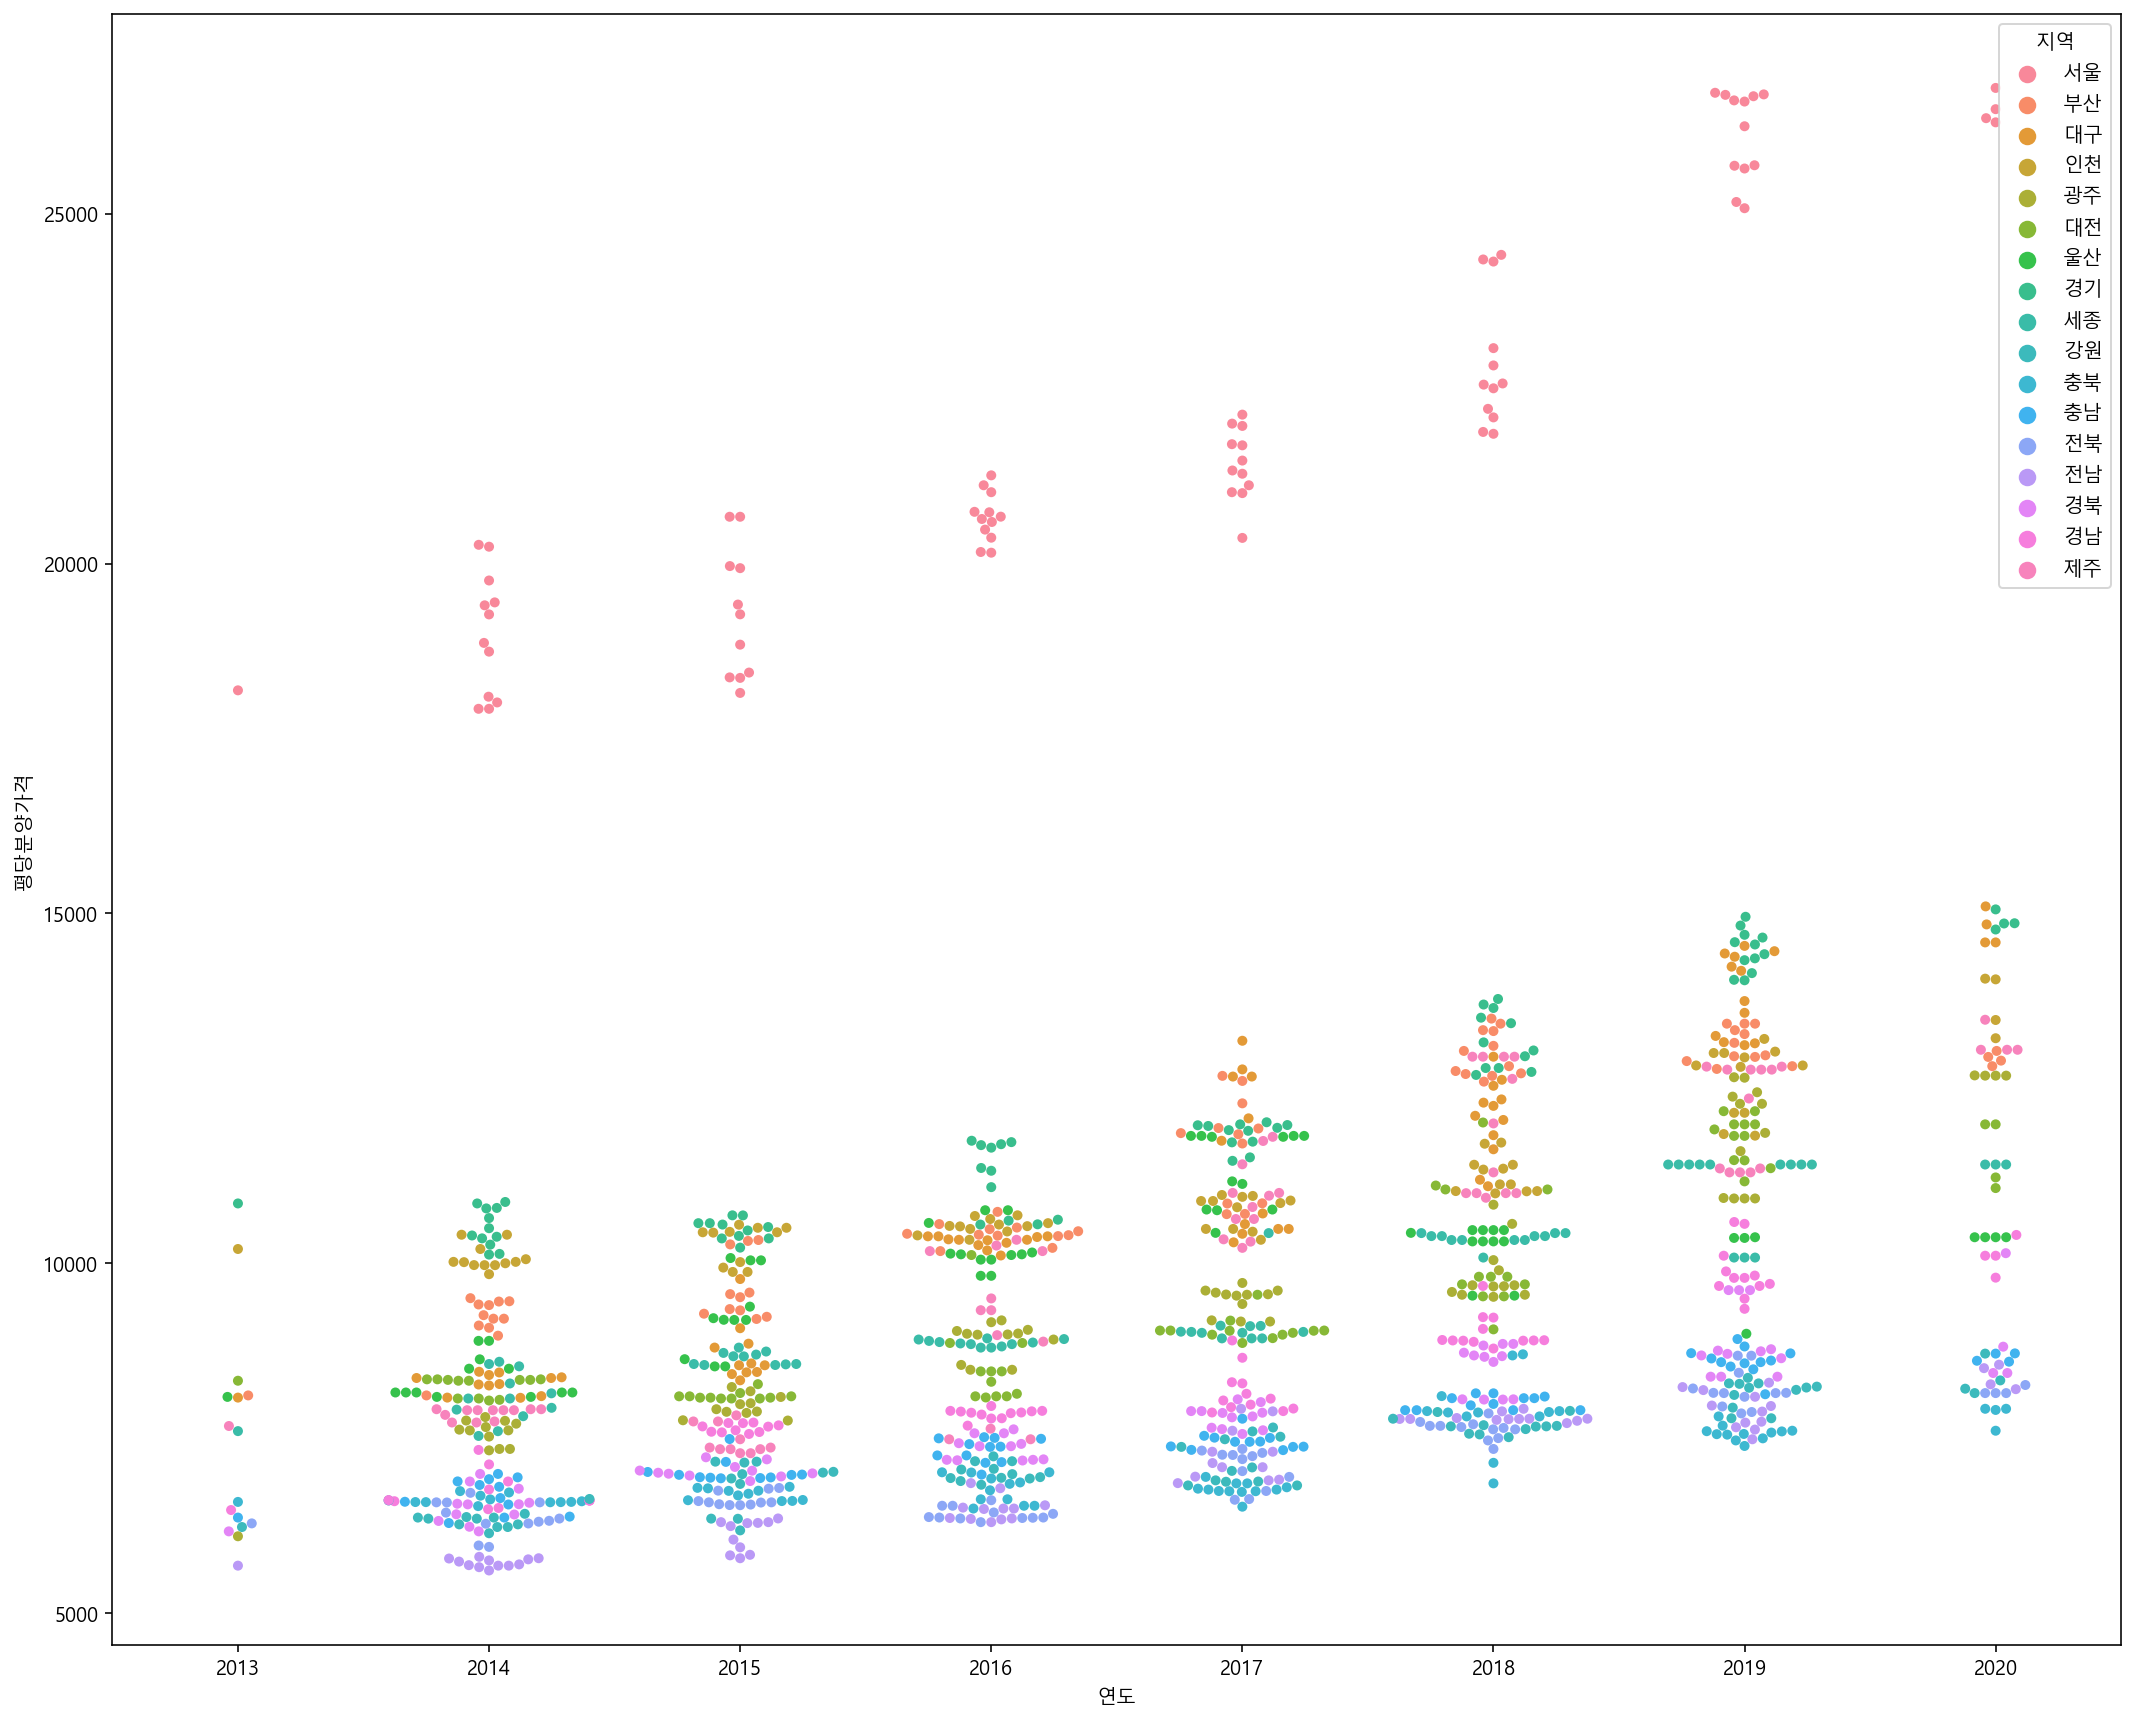

In [26]:
plt.figure(figsize=(18,15))
sns.swarmplot(data=df, x='연도', y='평당분양가격', hue='지역')

In [27]:
df_price = df_price.melt(id_vars = '지 역', var_name = '기간', value_name = '평균매매가격').copy()
df_price

지 역       기간    평균매매가격
0           전국  2012-01  264474.0
1          수도권  2012-01  365249.0
2          지방권  2012-01  163394.0
3        6대광역시  2012-01  195186.0
4        5대광역시  2012-01  190421.0
...        ...      ...       ...
24775   경남 거제시  2020-09  156366.0
24776   경남 양산시  2020-09  172828.0
24777       제주  2020-09  283991.0
24778   제주 제주시  2020-09  303757.0
24779  제주 서귀포시  2020-09  222196.0

[24780 rows x 3 columns]

In [28]:
def parse_year(date):
    year = date.split('-')[0]
    year = int(year)
    return year

def parse_month(date):
    month = date.split('-')[1]
    month = int(month)
    return month

df_price['지역'] = df_price['지 역']
df_price['연도'] = df_price['기간'].apply(parse_year)
df_price['월'] = df_price['기간'].apply(parse_month)

In [29]:
df_price.columns

Index(['지 역', '기간', '평균매매가격', '지역', '연도', '월'], dtype='object')

In [30]:
cols = ['평균매매가격', '지역', '연도', '월']
df_price = df_price[cols]

In [31]:
df_seoul = df_price[df_price['지역'].str.contains('서울')].copy()

In [32]:
local = '경기 부천시'

def city(local):
    name = local.split(' ')[0]
    name = str(name)
    return name

def city_lower(local):
    if len(local) > 2:
        name_lower = local.split(' ')[1]
        name_lower = str(name_lower)
        return name_lower

f'{city(local)} {city_lower(local)}'

'경기 부천시'

In [33]:
df_seoul['시도'] = df_seoul['지역'].apply(city)
df_seoul['구군'] = df_seoul['지역'].apply(city_lower)

In [34]:
df_seoul = df_seoul[1:]
cols = ['평균매매가격','연도','월','시도','구군']
df_seoul = df_seoul[cols].copy()


In [35]:
df_seoul

평균매매가격    연도  월  시도    구군
8       405962.0  2012  1  서울  강북지역
9       706316.0  2012  1  서울   도심권
10      501646.0  2012  1  서울   종로구
11      545130.0  2012  1  서울    중구
12      852152.0  2012  1  서울   용산구
...          ...   ... ..  ..   ...
24579  1439654.0  2020  9  서울   동남권
24580  1759164.0  2020  9  서울   서초구
24581  1741538.0  2020  9  서울   강남구
24582  1266416.0  2020  9  서울   송파구
24583   800418.0  2020  9  서울   강동구

[3464 rows x 5 columns]

In [36]:
df_seoul = df_seoul[df_seoul['구군'].str.contains('군|지역|권') == False].copy()

## 서울시 전처리 완료


In [37]:
df_seoul

평균매매가격    연도  월  시도   구군
10      501646.0  2012  1  서울  종로구
11      545130.0  2012  1  서울   중구
12      852152.0  2012  1  서울  용산구
14      475333.0  2012  1  서울  성동구
15      666091.0  2012  1  서울  광진구
...          ...   ... ..  ..  ...
24578   530511.0  2020  9  서울  관악구
24580  1759164.0  2020  9  서울  서초구
24581  1741538.0  2020  9  서울  강남구
24582  1266416.0  2020  9  서울  송파구
24583   800418.0  2020  9  서울  강동구

[2625 rows x 5 columns]

In [38]:
df_b  = df_price[df_price['지역'].str.contains('부천')].copy()

In [39]:
df_b.head()

평균매매가격      지역    연도  월
64    264784.0  경기 부천시  2012  1
300   263646.0  경기 부천시  2012  2
536   262913.0  경기 부천시  2012  3
772   261679.0  경기 부천시  2012  4
1008  260055.0  경기 부천시  2012  5

In [40]:
def city(local):
    name = local.split(' ')[0]
    name = str(name)
    return name

def city_lower(local):
    name_lower = local.split(' ')[1]
    name_lower = str(name_lower)
    return name_lower
    
df_b['시도'] = df_b['지역'].apply(city_lower)

In [41]:
df_b = df_b.drop('지역', axis=1).copy()

## 부천시 전처리 완료

In [42]:
df_b

평균매매가격    연도  월   시도
64     264784.0  2012  1  부천시
300    263646.0  2012  2  부천시
536    262913.0  2012  3  부천시
772    261679.0  2012  4  부천시
1008   260055.0  2012  5  부천시
...         ...   ... ..  ...
23664  358671.0  2020  5  부천시
23900  362547.0  2020  6  부천시
24136  366676.0  2020  7  부천시
24372  370076.0  2020  8  부천시
24608  372088.0  2020  9  부천시

[105 rows x 4 columns]

## 서울시 시각화

### 서울시 구 별 시각화

Text(0.5, 1.0, '서울시 구 별 아파트 평균 매매가 (단위:천원)')

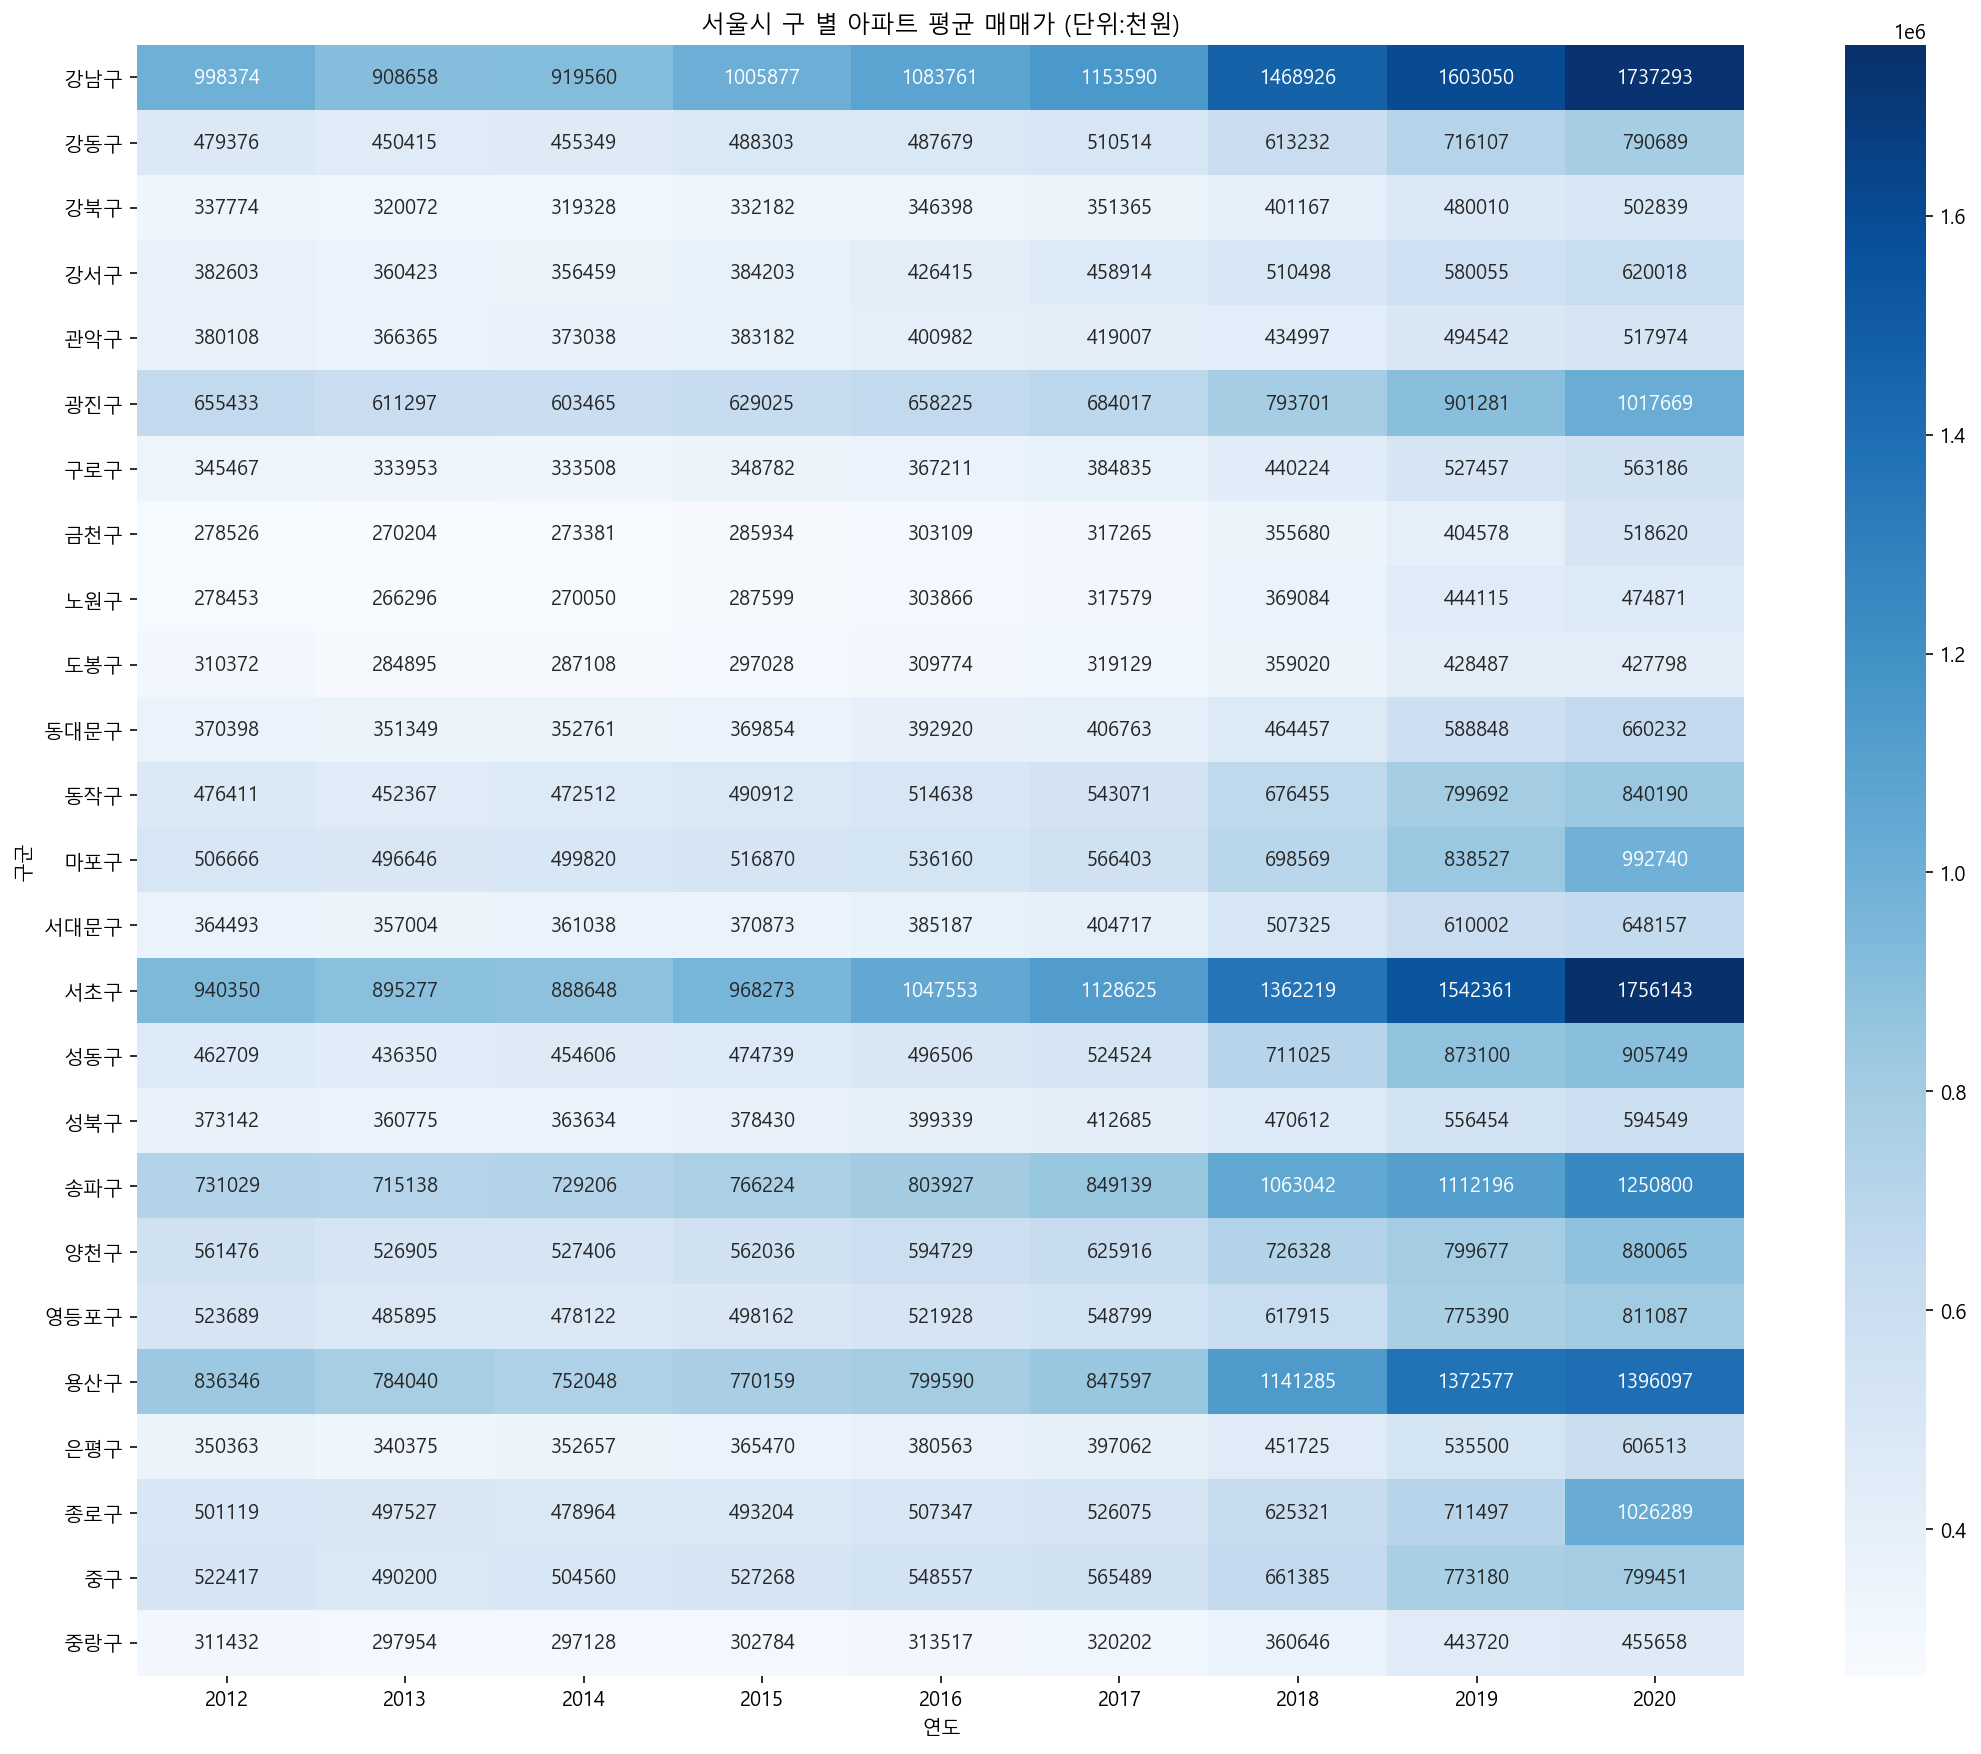

In [43]:
s_g = df_seoul.groupby(['구군','연도'])['평균매매가격'].mean().unstack().round()
s_p = df_seoul.pivot_table(index = '구군', columns ='연도', values ='평균매매가격')
plt.figure(figsize=(18,15))
sns.heatmap(data=s_g,annot=True, fmt = '.0f', cmap = 'Blues').set_title('서울시 구 별 아파트 평균 매매가 (단위:천원)')

Text(0.5, 1.0, '서울시 구 별 아파트 평균 매매가 (단위:천원)')

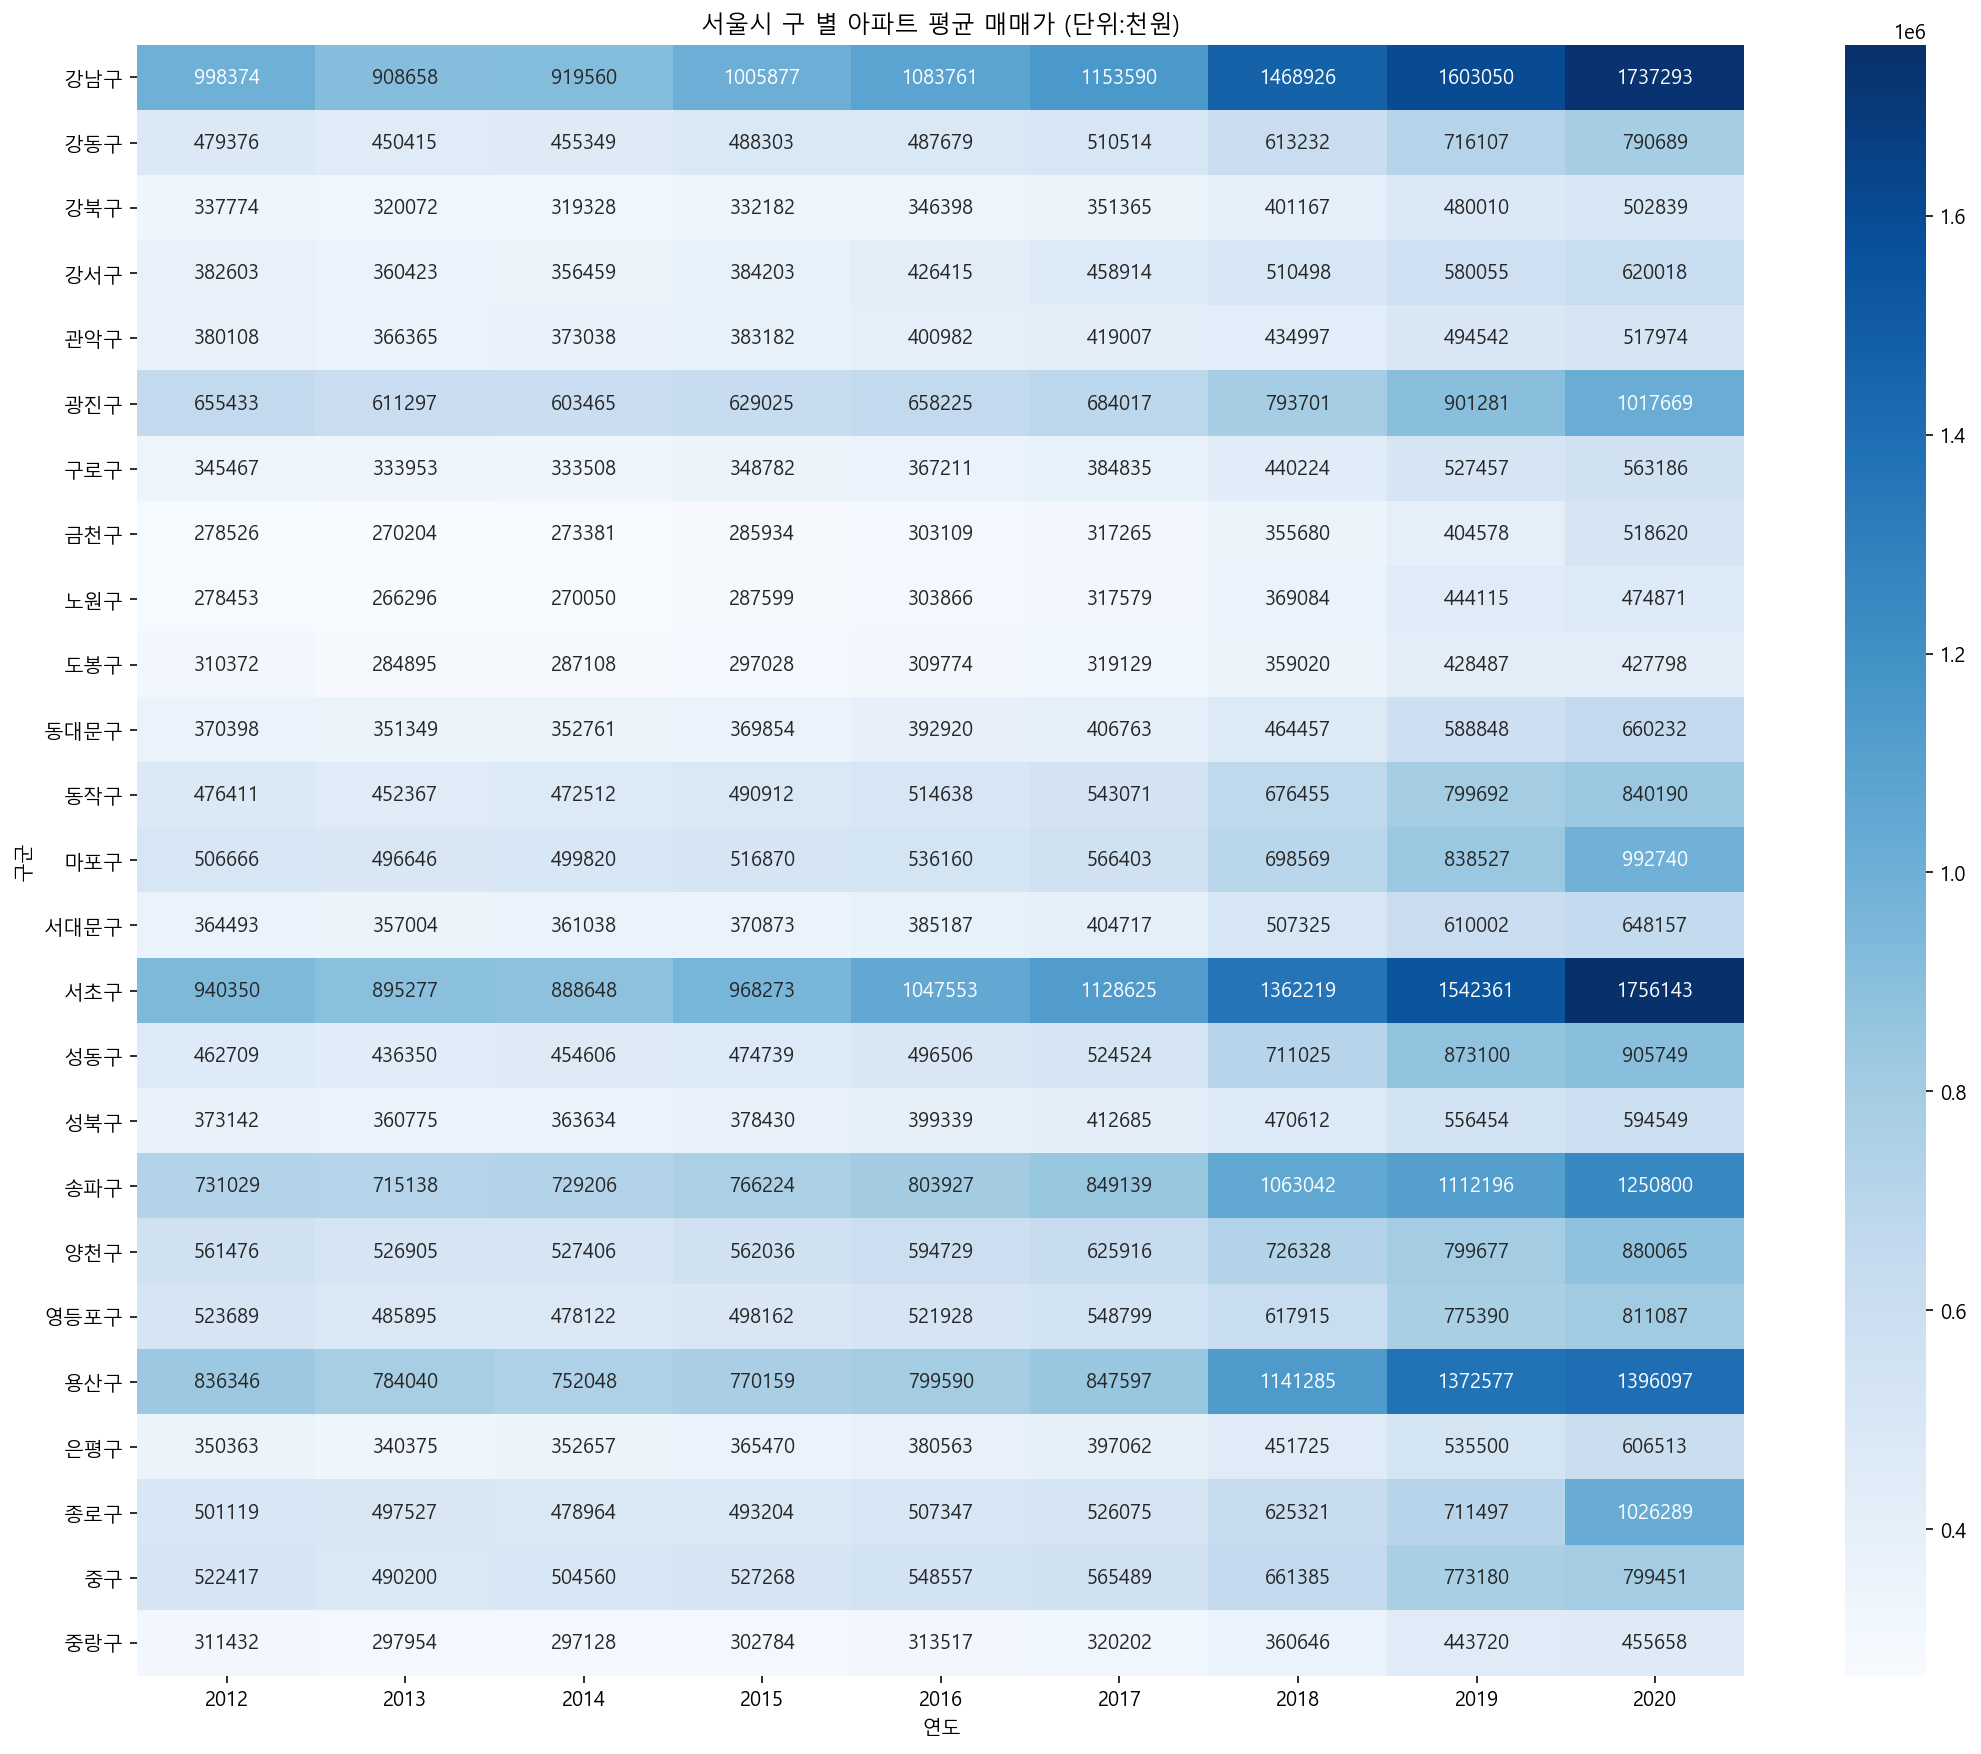

In [44]:
s_p   
plt.figure(figsize=(18,15))
sns.heatmap(data=s_p,annot=True, fmt = '.0f', cmap = 'Blues').set_title('서울시 구 별 아파트 평균 매매가 (단위:천원)')

### 서울시 전체 시각화

Text(0.5, 1.0, '서울시 평균 아파트 매매 가격 (단위:십억원)')

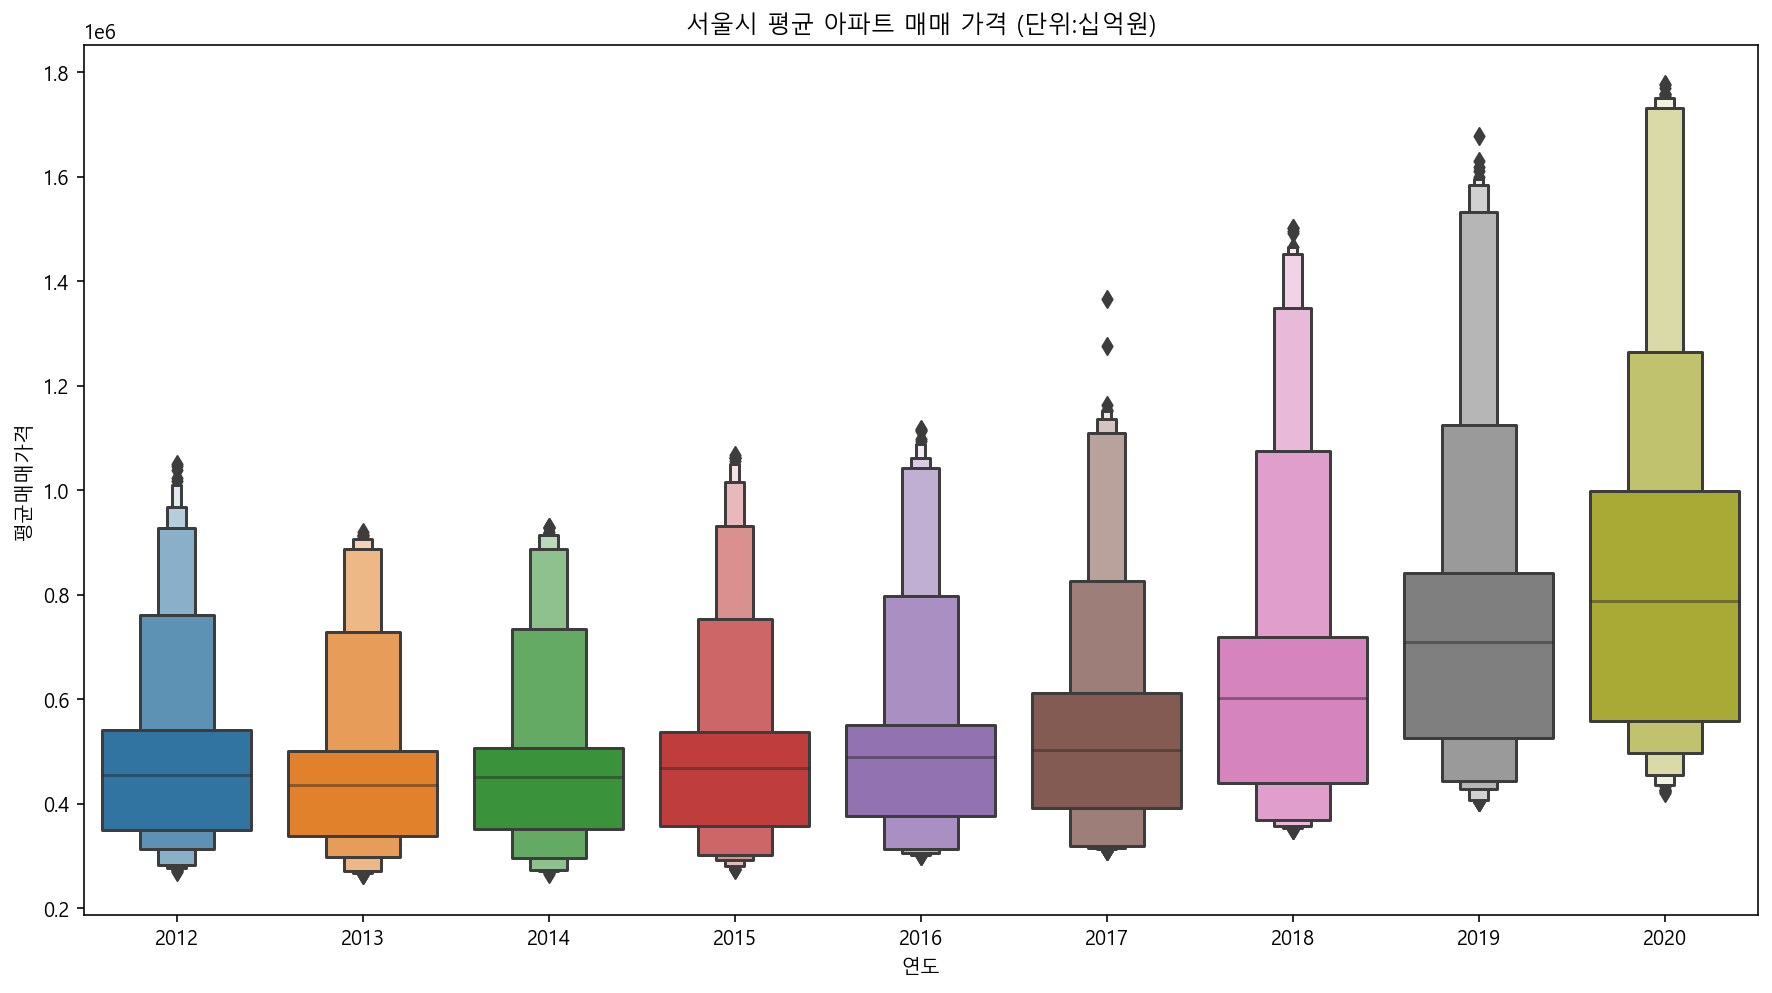

In [45]:
plt.figure(figsize=(15,8))
sns.boxenplot(data = df_seoul, x = '연도', y='평균매매가격').set_title('서울시 평균 아파트 매매 가격 (단위:십억원)')

<AxesSubplot:xlabel='연도', ylabel='평균매매가격'>

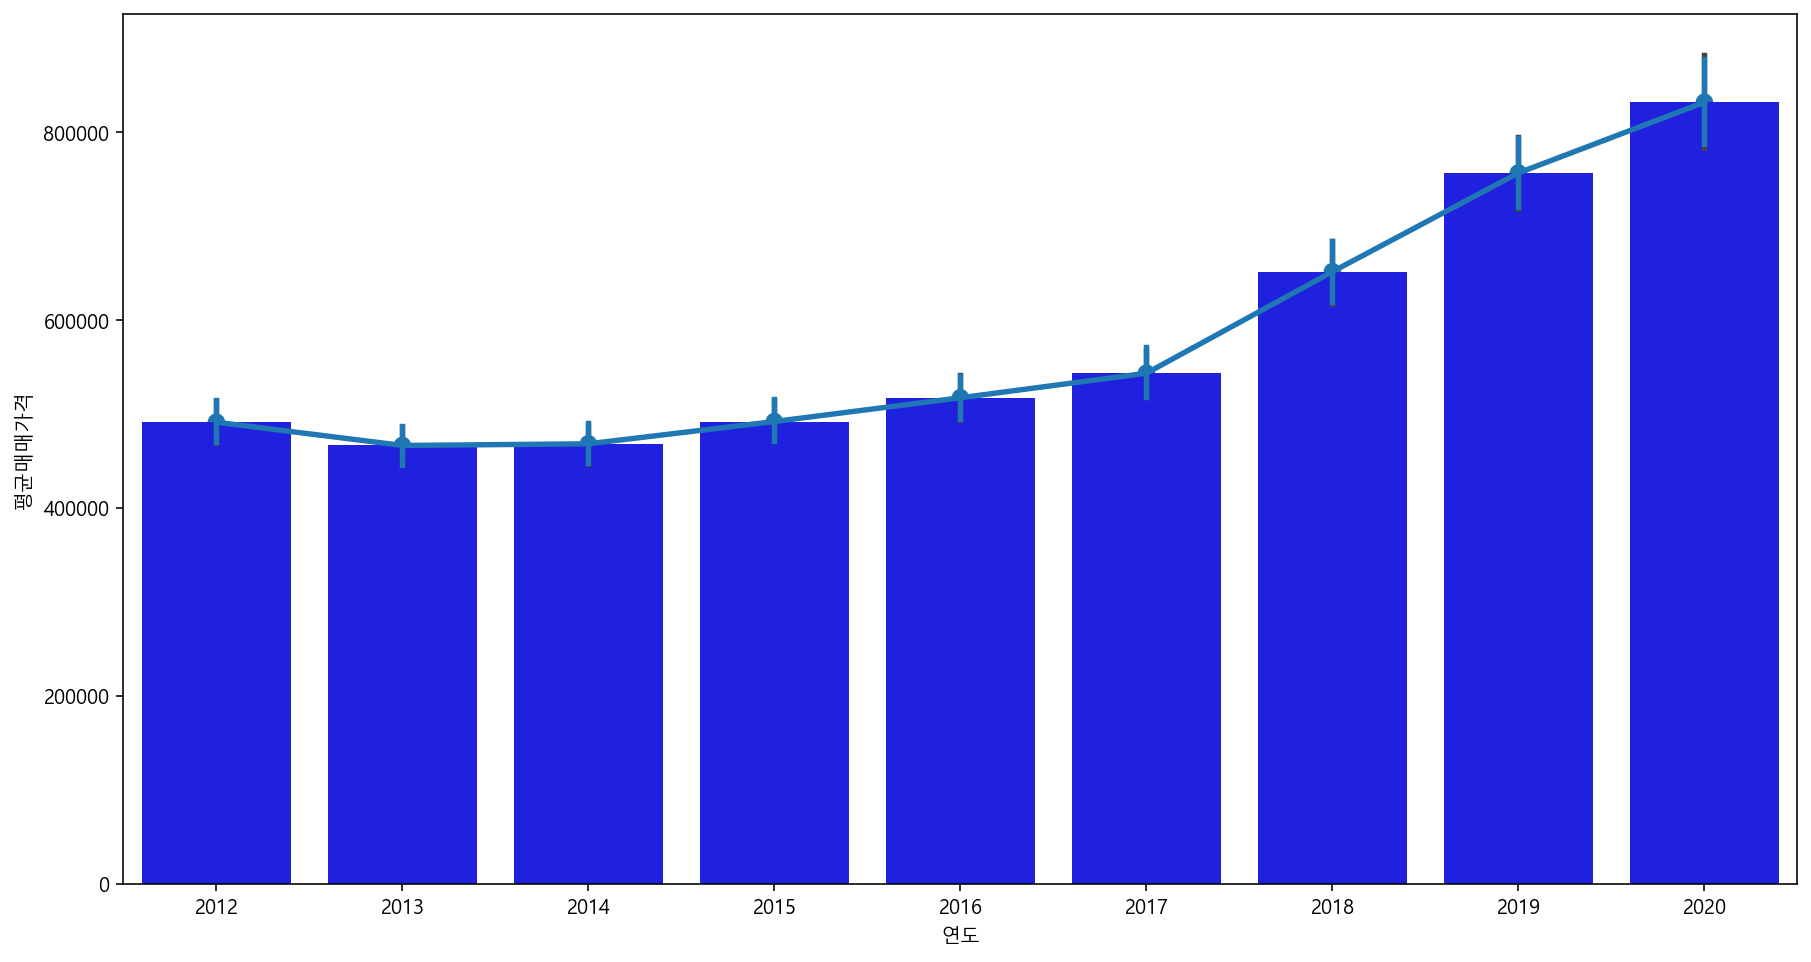

In [46]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_seoul, x="연도", y="평균매매가격", color='b')
sns.pointplot(data=df_seoul, x="연도", y="평균매매가격")

## 경기도 시각화

### 부천시 시각화

In [47]:
df_b.head(1)

평균매매가격    연도  월   시도
64  264784.0  2012  1  부천시

Text(0.5, 1.0, '부천시 아파트 평균 매매 가격 (단위:천원) ')

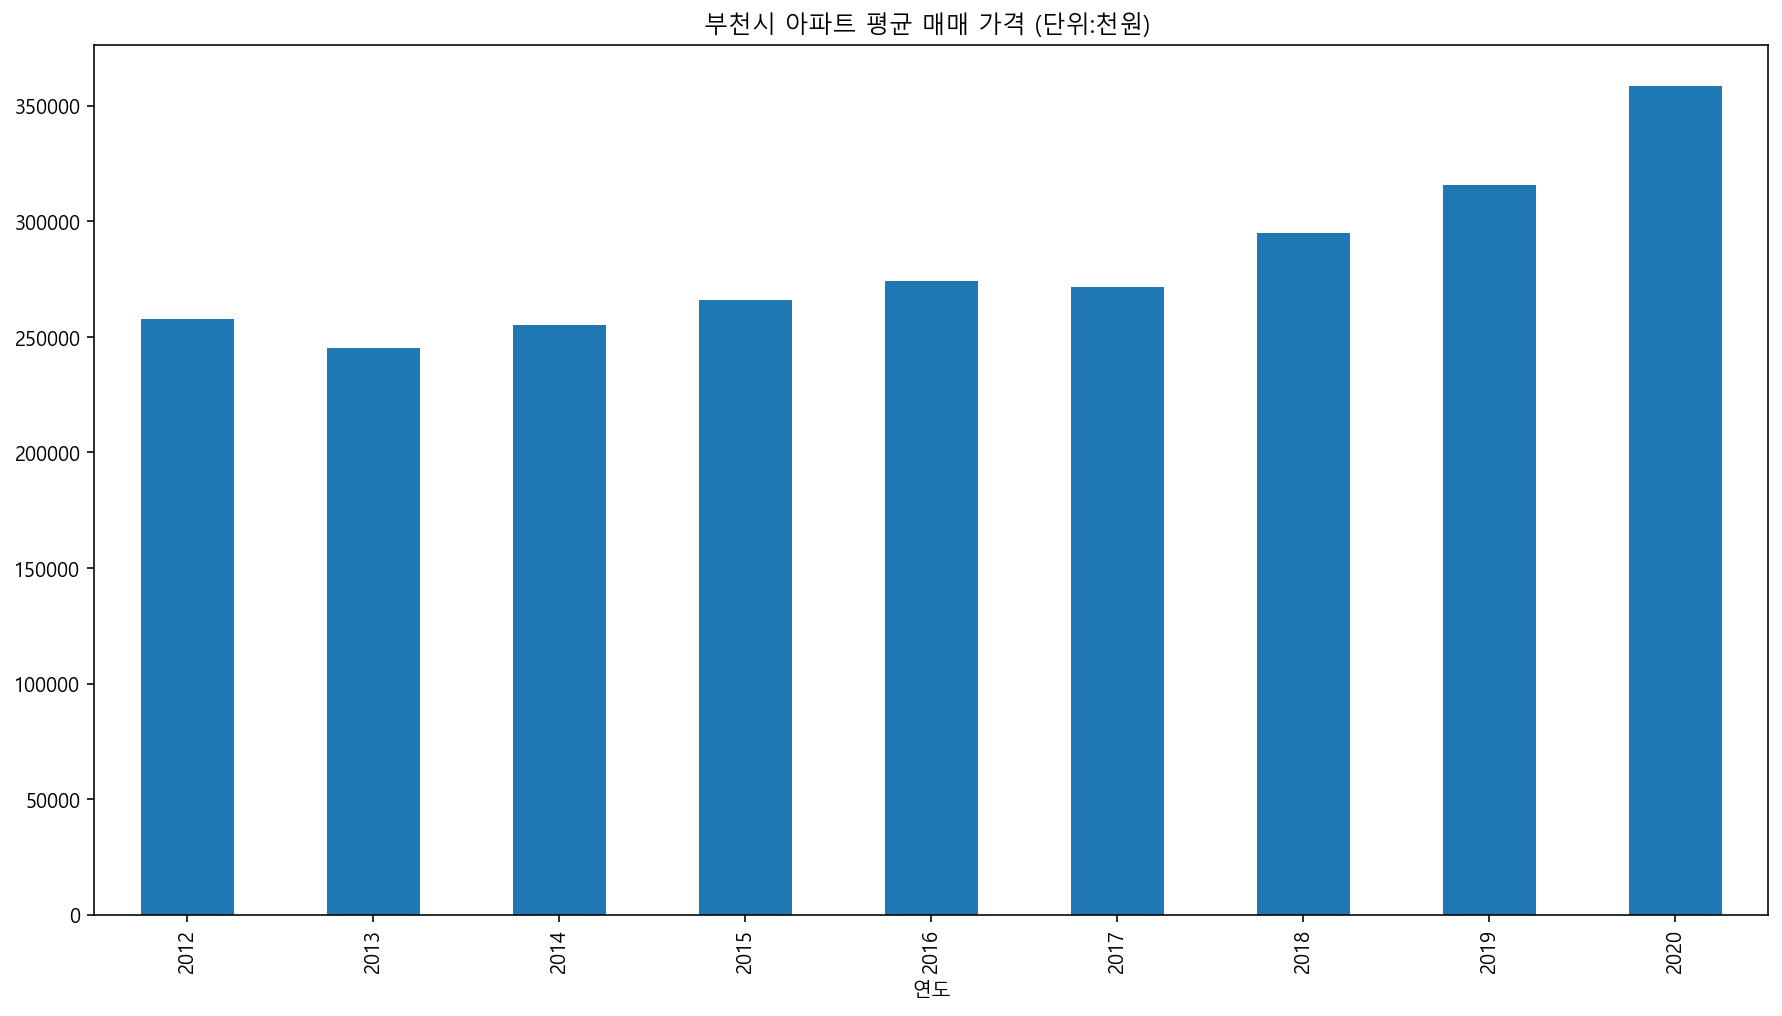

In [48]:
g_b = df_b.groupby(['연도'])['평균매매가격'].mean()
g_b.plot.bar(figsize=(15,8)).set_title('부천시 아파트 평균 매매 가격 (단위:천원) ')

<AxesSubplot:xlabel='연도', ylabel='평균매매가격'>

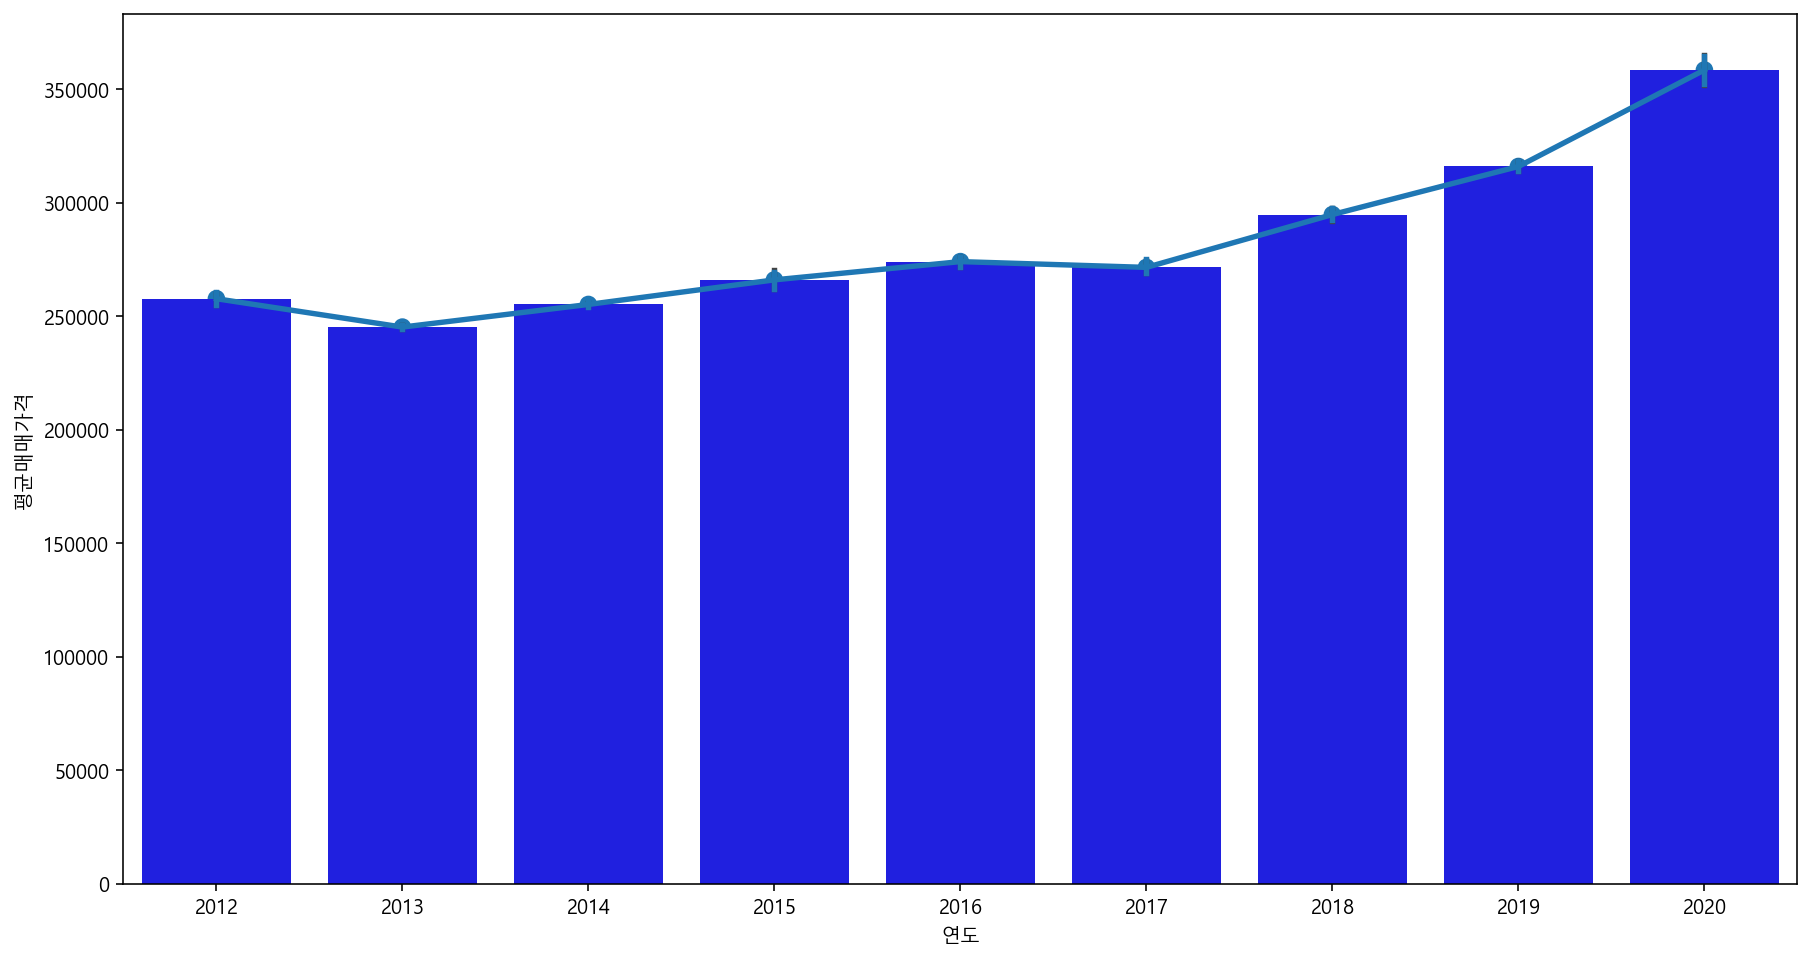

In [49]:
plt.figure(figsize=(15,8))
sns.barplot(data=df_b, x="연도", y="평균매매가격", color='b')
sns.pointplot(data=df_b, x="연도", y="평균매매가격")

Text(0.5, 1.0, '부천시 평균 아파트 매매 가격 (단위:천원)')

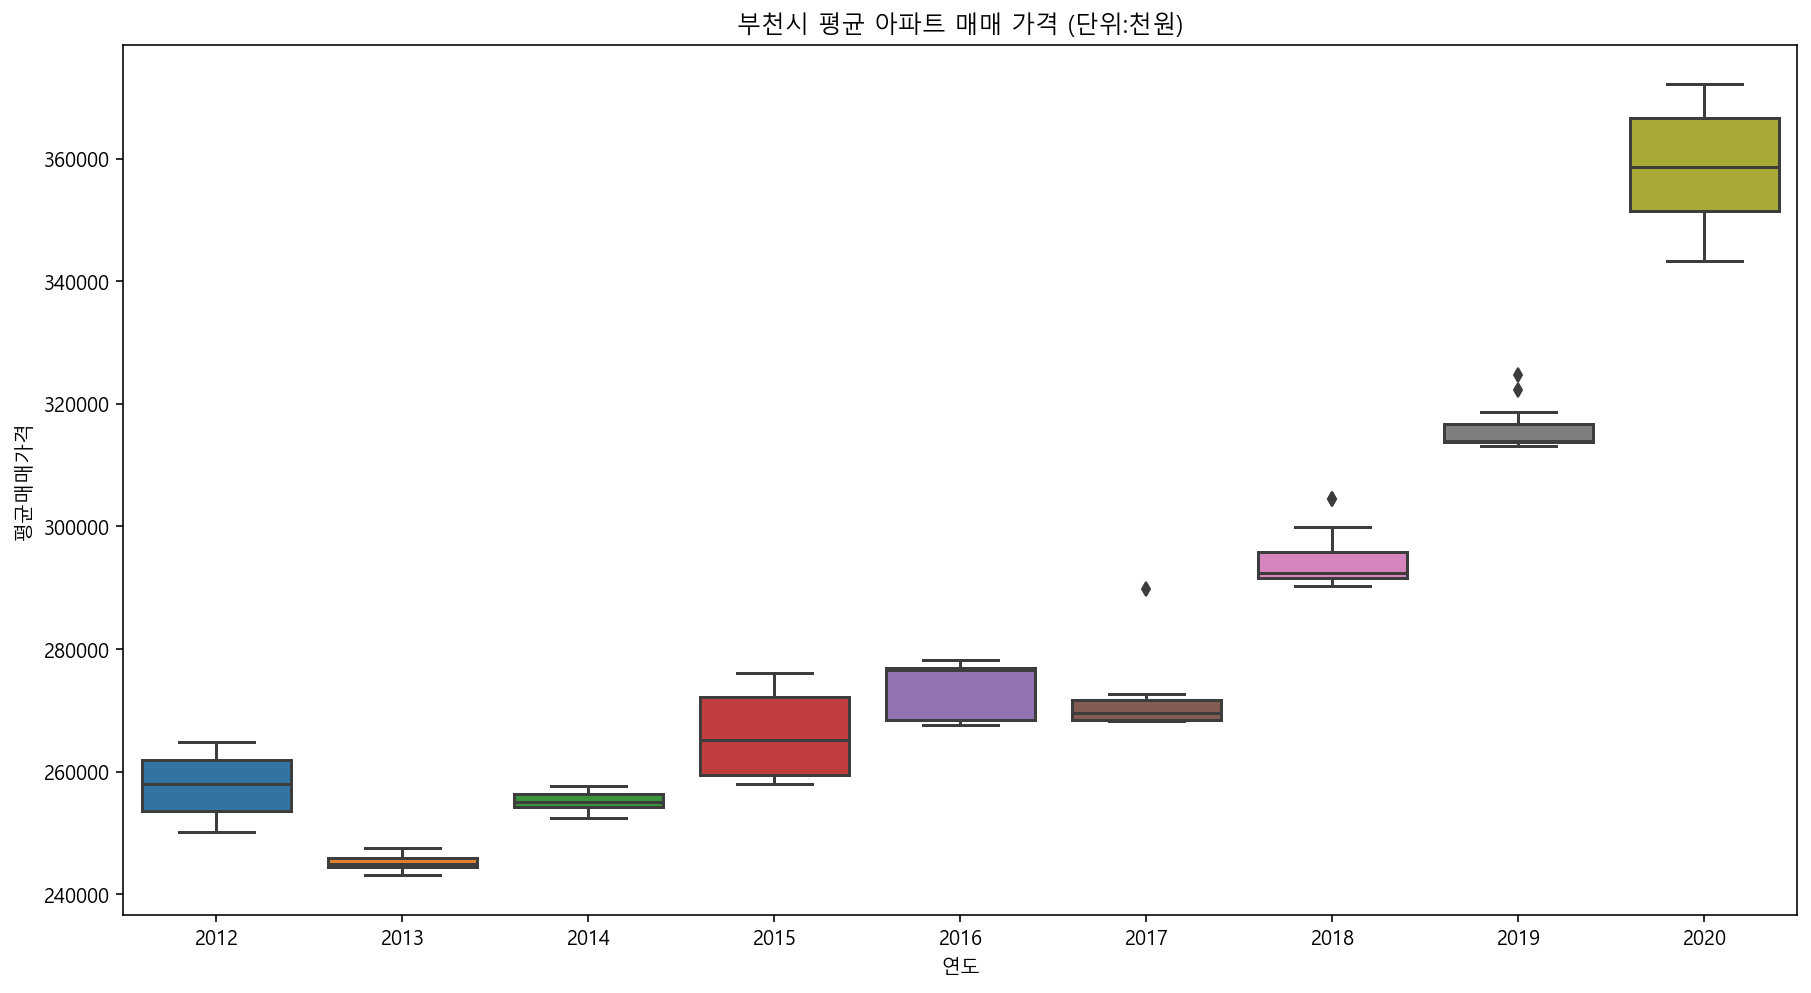

In [50]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df_b, x="연도", y="평균매매가격").set_title('부천시 평균 아파트 매매 가격 (단위:천원)')

In [51]:
df_price.head()

평균매매가격     지역    연도  월
0  264474.0     전국  2012  1
1  365249.0    수도권  2012  1
2  163394.0    지방권  2012  1
3  195186.0  6대광역시  2012  1
4  190421.0  5대광역시  2012  1

In [52]:
df_center = df_price[df_price['지역'].str.contains('경기')].copy()

In [53]:
df_center = df_center[2:]

In [54]:
df_center['시군'] =  df_center.loc[df_center['지역'].str.contains('시'), '지역']

In [55]:
df_center = df_center[df_center['시군'].notnull()]

In [56]:
df_center = df_center[['평균매매가격','연도', '월', '시군']].copy()

In [57]:
df_center['시군'] = df_center['시군'].apply(city_lower)

### 경기도 전처리 완료

In [58]:
df_center

평균매매가격    연도  월    시군
42     652174.0  2012  1   과천시
43     319433.0  2012  1   안양시
46     506489.0  2012  1   성남시
50     290792.0  2012  1   군포시
51     320598.0  2012  1   의왕시
...         ...   ... ..   ...
24634  274254.0  2020  9   파주시
24636  137188.0  2020  9   포천시
24637  141532.0  2020  9  동두천시
24638  201096.0  2020  9   양주시
24639  258260.0  2020  9  의정부시

[2940 rows x 4 columns]

In [59]:
g_c = df_center.groupby(['시군','연도'])['평균매매가격'].mean().unstack().round()

Text(0.5, 1.0, '경기도 시군 아파트 평균 매매가 동향 (단위:천원)')

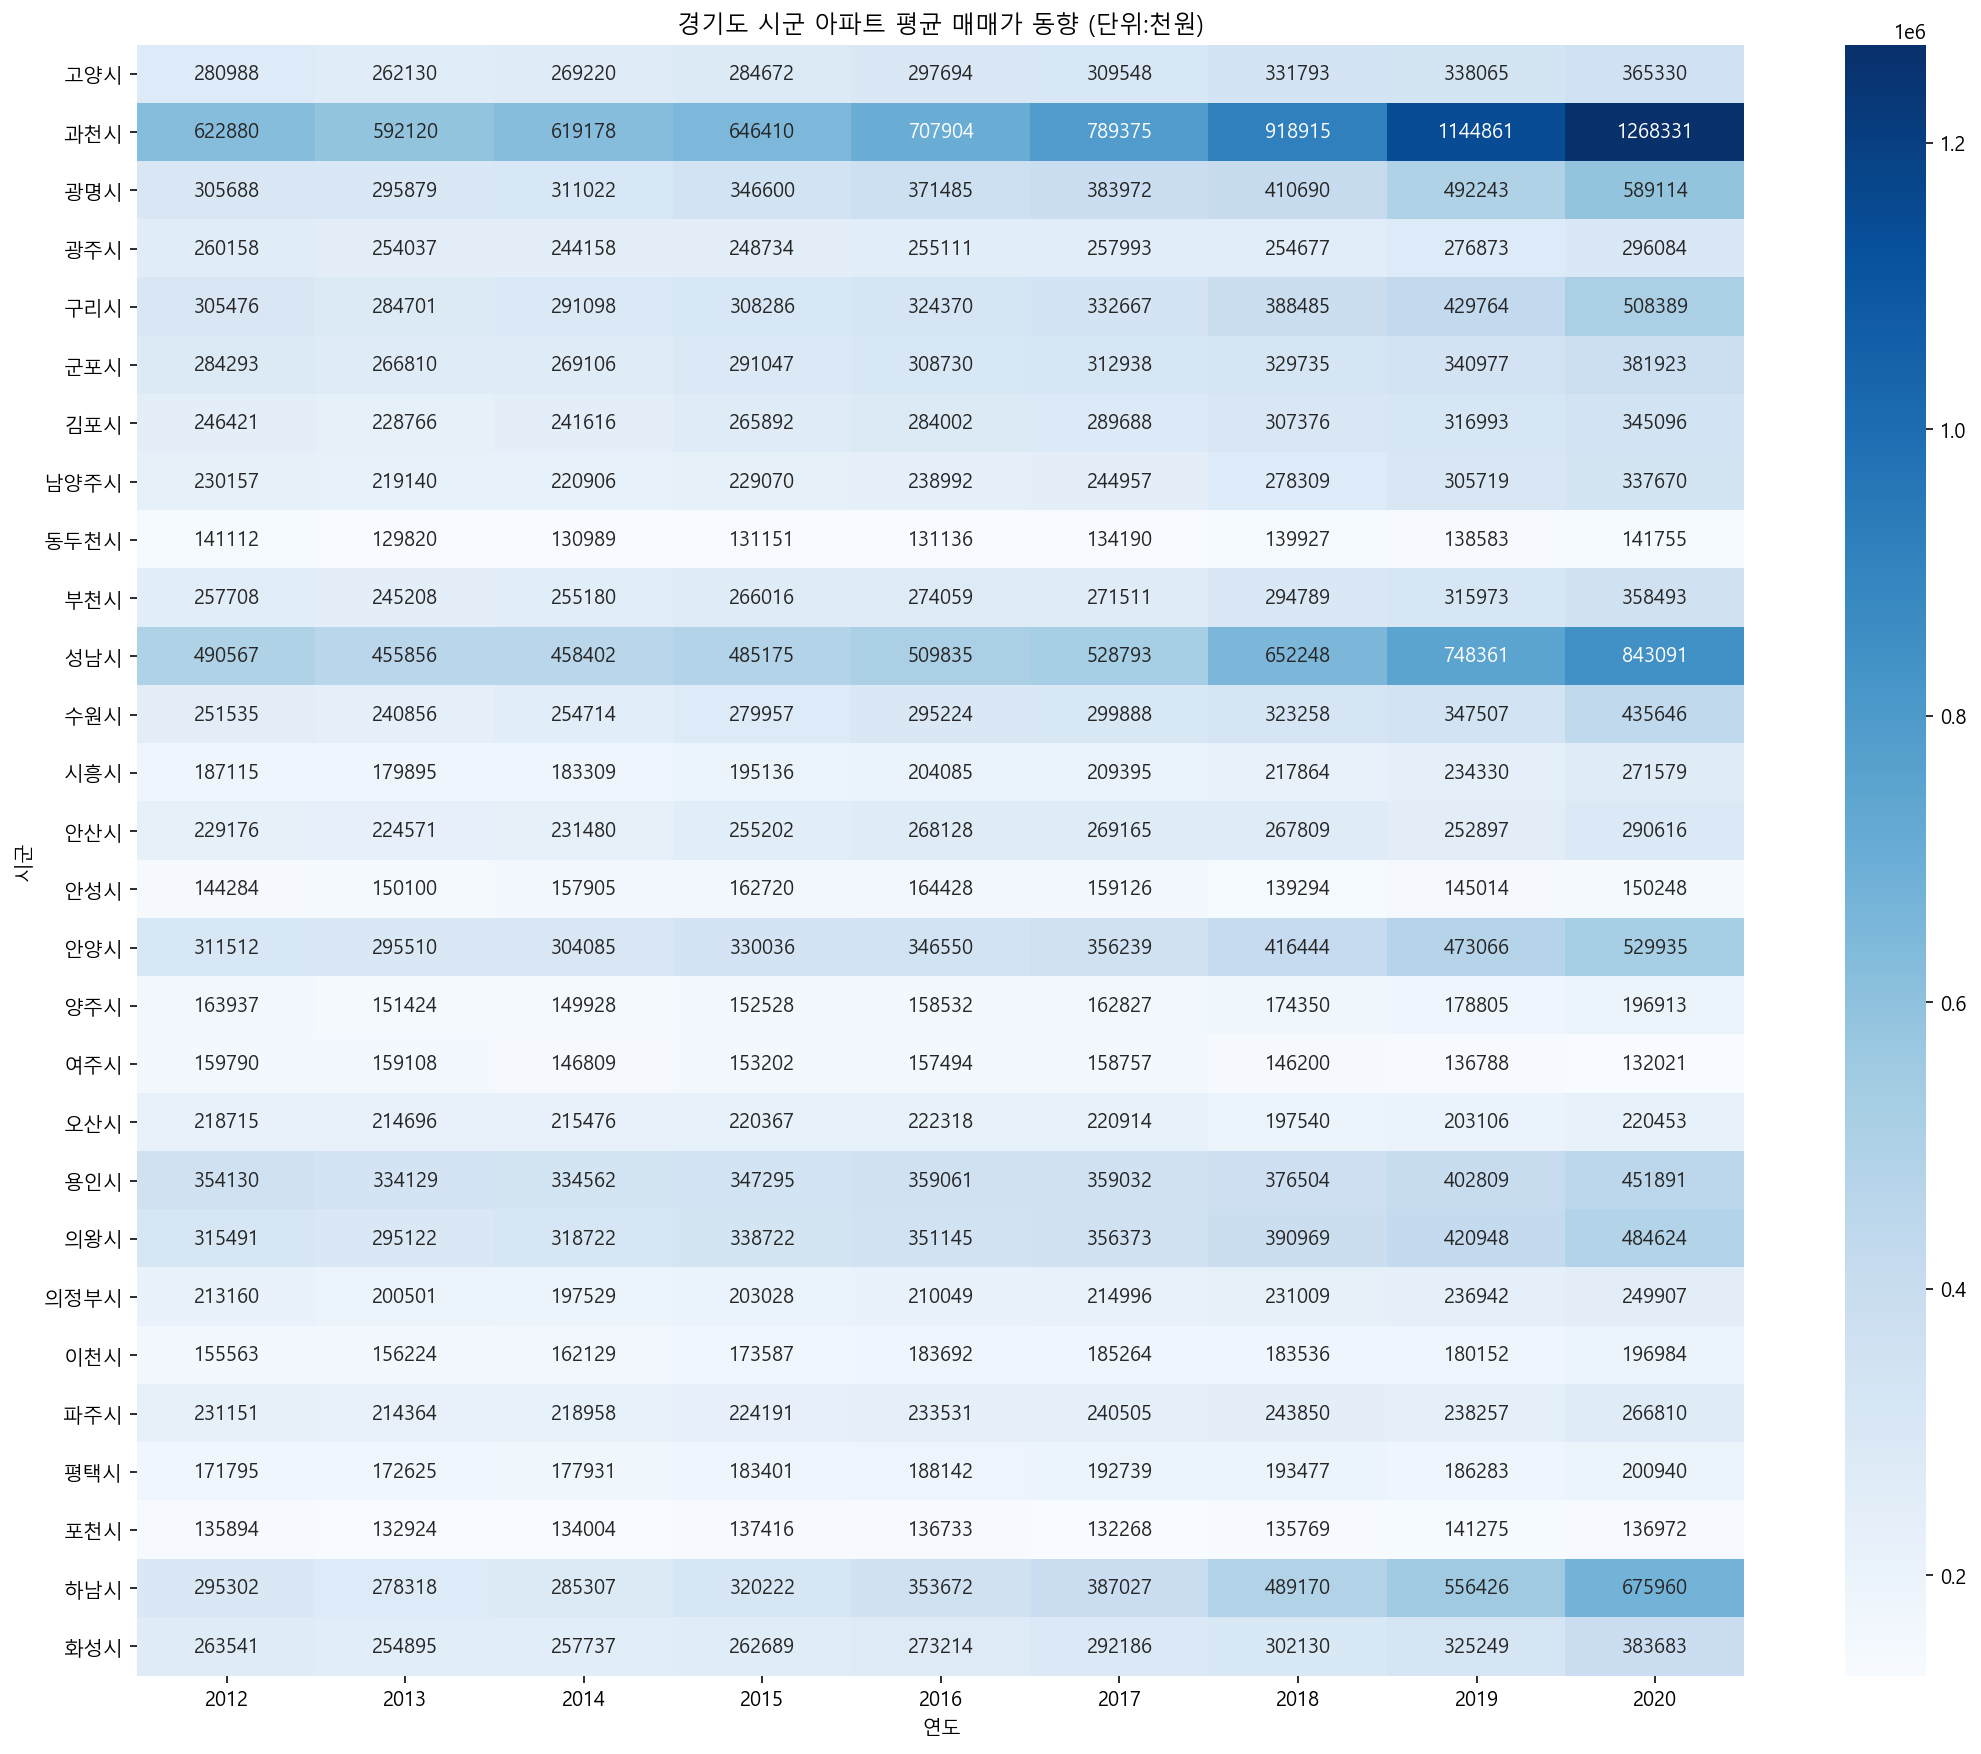

In [60]:
plt.figure(figsize=(18,15))
sns.heatmap(g_c, annot = True, fmt = '.0f', cmap='Blues').set_title('경기도 시군 아파트 평균 매매가 동향 (단위:천원)')

Text(0.5, 1.0, '경기도 시군 아파트 평균 매매가 동향')

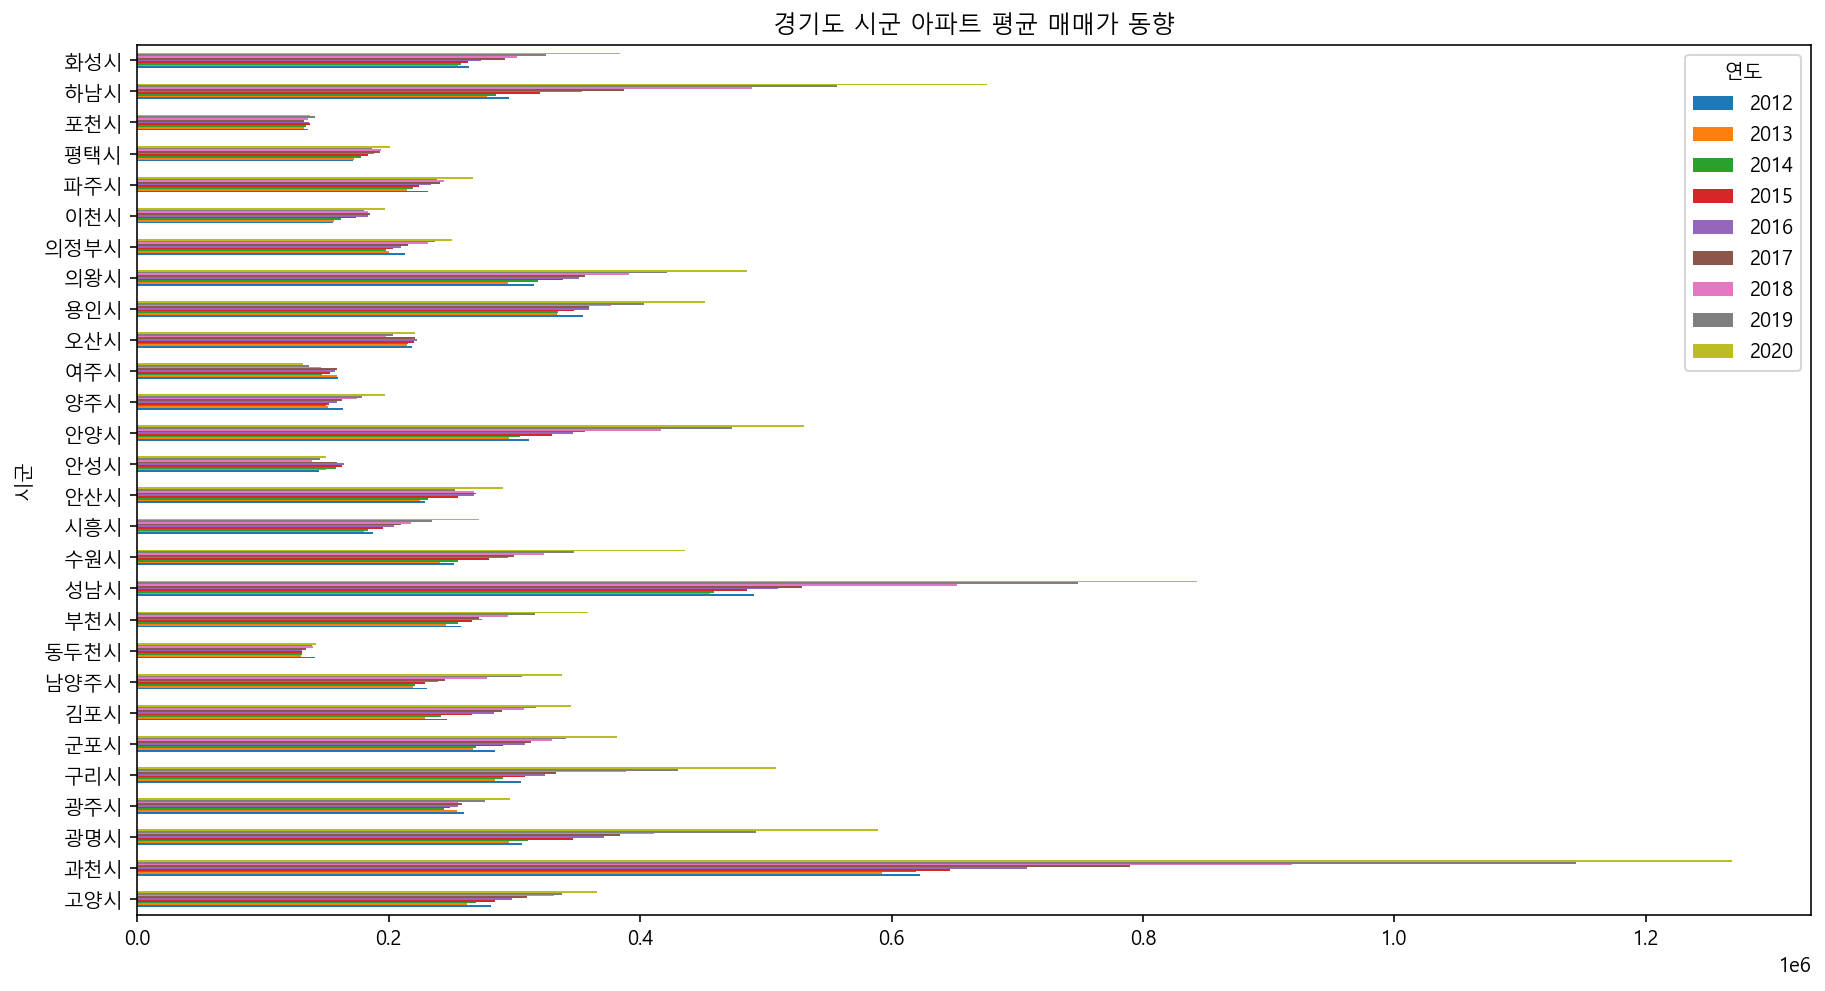

In [61]:
g_c.plot.barh(figsize=(15,8)).set_title('경기도 시군 아파트 평균 매매가 동향')

C:\Users\pjk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pjk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 44.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pjk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pjk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 56.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\pjk\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 43.8% of the points cannot be

<AxesSubplot:xlabel='시군', ylabel='평균매매가격'>

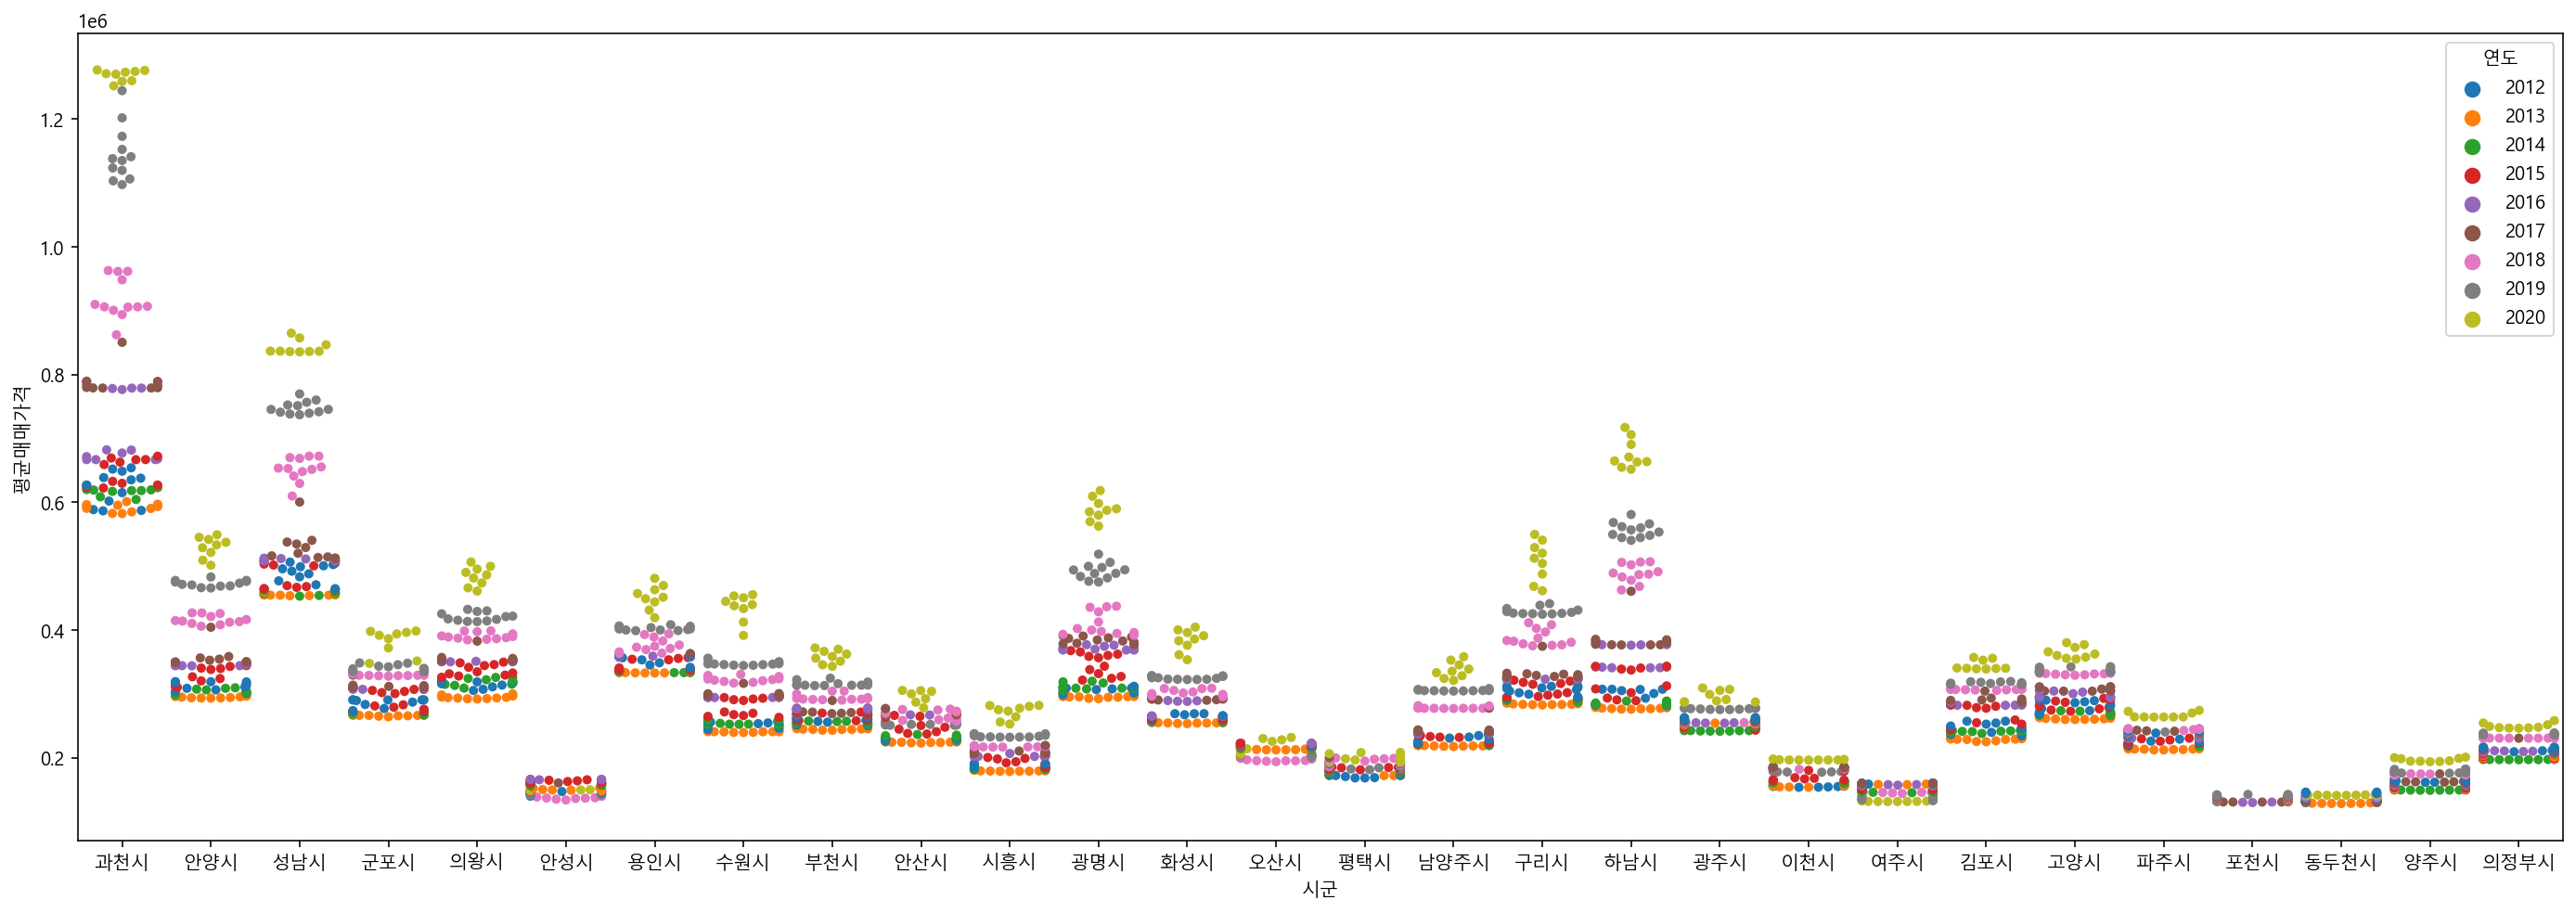

In [62]:
plt.figure(figsize=(24, 8))
sns.swarmplot(data=df_center, x="시군", y="평균매매가격", hue="연도")

# 부천시 상권업종 분석

## 데이터 전처리

In [205]:
df_s = pd.read_csv(r'C:\Users\pjk\Documents\Data_set\Jupyter_data\소상공인시장진흥공단_상가(상권)정보_서울_202012.csv', sep='|')
df_g = pd.read_csv(r'C:\Users\pjk\Documents\Data_set\Jupyter_data\소상공인시장진흥공단_상가(상권)정보_경기_202012.csv', sep='|')

In [110]:
pd.options.display.max_columns = 39

In [111]:
n = df_g.isna().sum()
n

상가업소번호            0
상호명               1
지점명          470532
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      34629
표준산업분류명       34629
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명           6139
법정동코드           132
법정동명            132
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지        150956
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        450104
건물관리번호            0
건물명          303581
도로명주소             0
구우편번호          1437
신우편번호            10
동정보          499533
층정보          291094
호정보          419658
경도                0
위도                0
dtype: int64

In [112]:
not_use = n.sort_values(ascending=False).head(13)

In [113]:
not_ues_cols = not_use.index

In [114]:
not_ues_cols

Index(['동정보', '지점명', '건물부번지', '호정보', '건물명', '층정보', '지번부번지', '표준산업분류코드',
       '표준산업분류명', '행정동명', '구우편번호', '법정동코드', '법정동명'],
      dtype='object')

In [115]:
df_g.drop(not_ues_cols, axis=1)

상가업소번호        상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0       20555125         아싸         Q       음식       Q03   일식/수산물    Q03A19   
1       17175325       뱅이술술         Q       음식       Q01       한식    Q01A01   
2       17175337    마운틴한식뷔폐         Q       음식       Q01       한식    Q01A01   
3       20713599    눈높이러닝센타         R    학문/교육       R13   학문교육기타    R13A01   
4       20642964       유니베라         D       소매       D16    화장품소매    D16A01   
...          ...        ...       ...      ...       ...      ...       ...   
556888  17223578  스튜디오온마이웨이         F    생활서비스       F06       사진    F06A01   
556889  17223588     스튜디오앞북         F    생활서비스       F06       사진    F06A01   
556890  17223705  진덴트칼라외형복원         F    생활서비스       F06       사진    F06A01   
556891  17223572     스튜디오르민         F    생활서비스       F06       사진    F06A01   
556892  17223715     판다스튜디오         F    생활서비스       F06       사진    F06A01   

         상권업종소분류명  시도코드  시도명  시군구코드     시군구명       행정동코드                 지번코드  \
0            홍어전문    41  경기도  41461  용인시 처인구  4146125000  4146125027201910022   
1       한식/백반/한정식    41  경기도  41173  안양시 동안구  4117356600  4117310200216020006   
2       한식/백반/한정식    41  경기도  41171  안양시 만안구  4117152000  4117110100208370001   
3           학습지보급    41  경기도  41210      광명시  4121054000  4121010100201490006   
4          화장품판매점    41  경기도  41463  용인시 기흥구  4146356000  4146311200203740000   
...           ...   ...  ...    ...      ...         ...                  ...   
556888        사진관    41  경기도  41465  용인시 수지구  4146551000  4146510100212230000   
556889        사진관    41  경기도  41465  용인시 수지구  4146553000  4146510500208730000   
556890        사진관    41  경기도  41465  용인시 수지구  4146555000  4146510200211110000   
556891        사진관    41  경기도  41465  용인시 수지구  4146557000  4146510700200960001   
556892        사진관    41  경기도  41465  용인시 수지구  4146559000  4146510600207710000   

        대지구분코드 대지구분명  지번본번지                        지번주소         도로명코드  \
0            1    대지    191  경기도 용인시 처인구 포곡읍 전대리 191-22  414614409732   
1            1    대지   1602      경기도 안양시 동안구 관양동 1602-6  411734349080   
2            1    대지    837       경기도 안양시 만안구 안양동 837-1  411713182016   
3            1    대지    149           경기도 광명시 광명동 149-6  412103000022   
4            1    대지    374         경기도 용인시 기흥구 언남동 374  414634412059   
...        ...   ...    ...                         ...           ...   
556888       1    대지   1223       경기도 용인시 수지구 풍덕천동 1223  414654415165   
556889       1    대지    873         경기도 용인시 수지구 신봉동 873  414653205015   
556890       1    대지   1111        경기도 용인시 수지구 죽전동 1111  414654415118   
556891       1    대지     96        경기도 용인시 수지구 상현동 96-1  414654415082   
556892       1    대지    771         경기도 용인시 수지구 성복동 771  414653205009   

                            도로명  건물본번지                     건물관리번호  \
0       경기도 용인시 처인구 포곡읍 전대로78번길     13  4146125027101910022035121   
1          경기도 안양시 동안구 관평로182번길     23  4117310200116020006007279   
2               경기도 안양시 만안구 안양로    405  4117110100108370001006476   
3                   경기도 광명시 오리로    946  4121010100101490006003352   
4           경기도 용인시 기흥구 구성로64번길      1  4146311200103740000023783   
...                         ...    ...                        ...   
556888    경기도 용인시 수지구 풍덕천로171번길      9  4146510100100590002232574   
556889         경기도 용인시 수지구 신봉2로     26  4146510500108730000028401   
556890   경기도 용인시 수지구 용구대로2771번길     88  4146510200111110000028755   
556891      경기도 용인시 수지구 수지로78번길     18  4146510700100960001026675   
556892         경기도 용인시 수지구 성복1로     91  4146510600107710000000001   

                               도로명주소    신우편번호          경도         위도  
0       경기도 용인시 처인구 포곡읍 전대로78번길 13-1  17023.0  127.216943  37.286224  
1            경기도 안양시 동안구 관평로182번길 23  14066.0  126.961584  37.393748  
2                경기도 안양시 만안구 안양로 405  13988.0  126.914394  37.406669  
3                    경기도 광명시 오리로 946  14221.0  126.858147  37.478530  
4              경기도 용인시 기흥구 

In [116]:
def do(site):
    do = site.split(' ')[0]
    do = str(do)
    return do

def si(site):
    si = site.split(' ')[1]
    si = str(si)
    return si

def gu(site):
    listnum = len(site.split(' '))
    if listnum < 5:
        pass
    else:
        gu = site.split(' ')[2]
        return gu
    
def dong(site):
    listnum = len(site.split(' '))
    if listnum < 5:
        dong = site.split(' ')[2]
        return dong
    else:
        dong = site.split(' ')[3]
        return dong

In [117]:
df_g['도'] = df_g['지번주소'].apply(do)
df_g['시군'] = df_g['지번주소'].apply(si)
df_g['구읍면'] = df_g['지번주소'].apply(gu)
df_g['동리'] = df_g['지번주소'].apply(dong)

In [118]:
df_bc = df_g[df_g['시군'] == '부천시'].copy()
df_bc_y = df_bc[df_bc['동리'] == '역곡동'].copy()
df_bc_y.head()

상가업소번호      상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드    상권업종중분류명  \
481   24599717    우노메디칼  NaN         D       소매       D20    의약/의료품소매   
664   23021012    명문세탁소  NaN         F    생활서비스       F02    세탁/가사서비스   
872   23993064     한샘신발  NaN         D       소매       D06  가방/신발/액세서리   
1174  23197197    나스타염색  NaN         F    생활서비스       F01     이/미용/건강   
1689  20548625  은주네손칼국수  NaN         Q       음식       Q04          분식   

     상권업종소분류코드   상권업종소분류명 표준산업분류코드         표준산업분류명  시도코드  시도명  시군구코드 시군구명  \
481     D20A01     의료용품소매   G47811  의약품 및 의료용품 소매업    41  경기도  41190  부천시   
664     F02A01    세탁소/빨래방   S96912         가정용 세탁업    41  경기도  41190  부천시   
872     D06A01       신발소매   G47420          신발 소매업    41  경기도  41190  부천시   
1174    F01A01      여성미용실   S96112           두발미용업    41  경기도  41190  부천시   
1689    Q04A02  국수/만두/칼국수   I56194     분식 및 김밥 전문점    41  경기도  41190  부천시   

           행정동코드  행정동명         법정동코드 법정동명  ...               지번주소  \
481   4119058000  역곡2동  4.119011e+09  역곡동  ...  경기도 부천시 역곡동 27-56   
664   4119057000  역곡1동  4.119011e+09  역곡동  ...   경기도 부천시 역곡동 98-8   
872   4119057000  역곡1동  4.119011e+09  역곡동  ...   경기도 부천시 역곡동 83-5   
1174  4119057000  역곡1동  4.119011e+09  역곡동  ...   경기도 부천시 역곡동 99-6   
1689  4119057000  역곡1동  4.119011e+09  역곡동  ...    경기도 부천시 역곡동 204   

             도로명코드               도로명  건물본번지  건물부번지                     건물관리번호  \
481   411903185016       경기도 부천시 지봉로     27    NaN  4119510700100270056000001   
664   411904352378   경기도 부천시 역곡로46번길     21    NaN  4119510700100980008033070   
872   411904352121  경기도 부천시 부일로749번길     21    NaN  4119510700100830005001110   
1174  411903184012       경기도 부천시 역곡로     52    NaN  4119510700100990006008565   
1689  411904352536  경기도 부천시 지봉로143번길     39    NaN  4119510700102040000008556   

        건물명                도로명주소     구우편번호    신우편번호  동정보  층정보  호정보  \
481   효성쉐르빌       경기도 부천시 지봉로 27  420100.0  14662.0    1  NaN  NaN   
664   명성홈타운   경기도 부천시 역곡로46번길 21  420100.0  14668.0  NaN  NaN  NaN   
872     NaN  경기도 부천시 부일로749번길 21  420100.0  14670.0  NaN    1  NaN   
1174    위브빌       경기도 부천시 역곡로 52  420100.0  14668.0    나  NaN  101   
1689  예원아파트  경기도 부천시 지봉로143번길 39  420100.0  14667.0    E  NaN  107   

              경도         위도    도   시군   구읍면   동리  
481   126.804971  37.484419  경기도  부천시  None  역곡동  
664   126.810949  37.489589  경기도  부천시  None  역곡동  
872   126.812286  37.487277  경기도  부천시  None  역곡동  
1174  126.809804  37.489784  경기도  부천시  None  역곡동  
1689  126.813391  37.491082  경기도  부천시  None  역곡동  

[5 rows x 43 columns]

## 역곡동 음식 비교 시각화

Text(0.5, 1.0, '역곡동 상권업종 중분류 상위 10개')

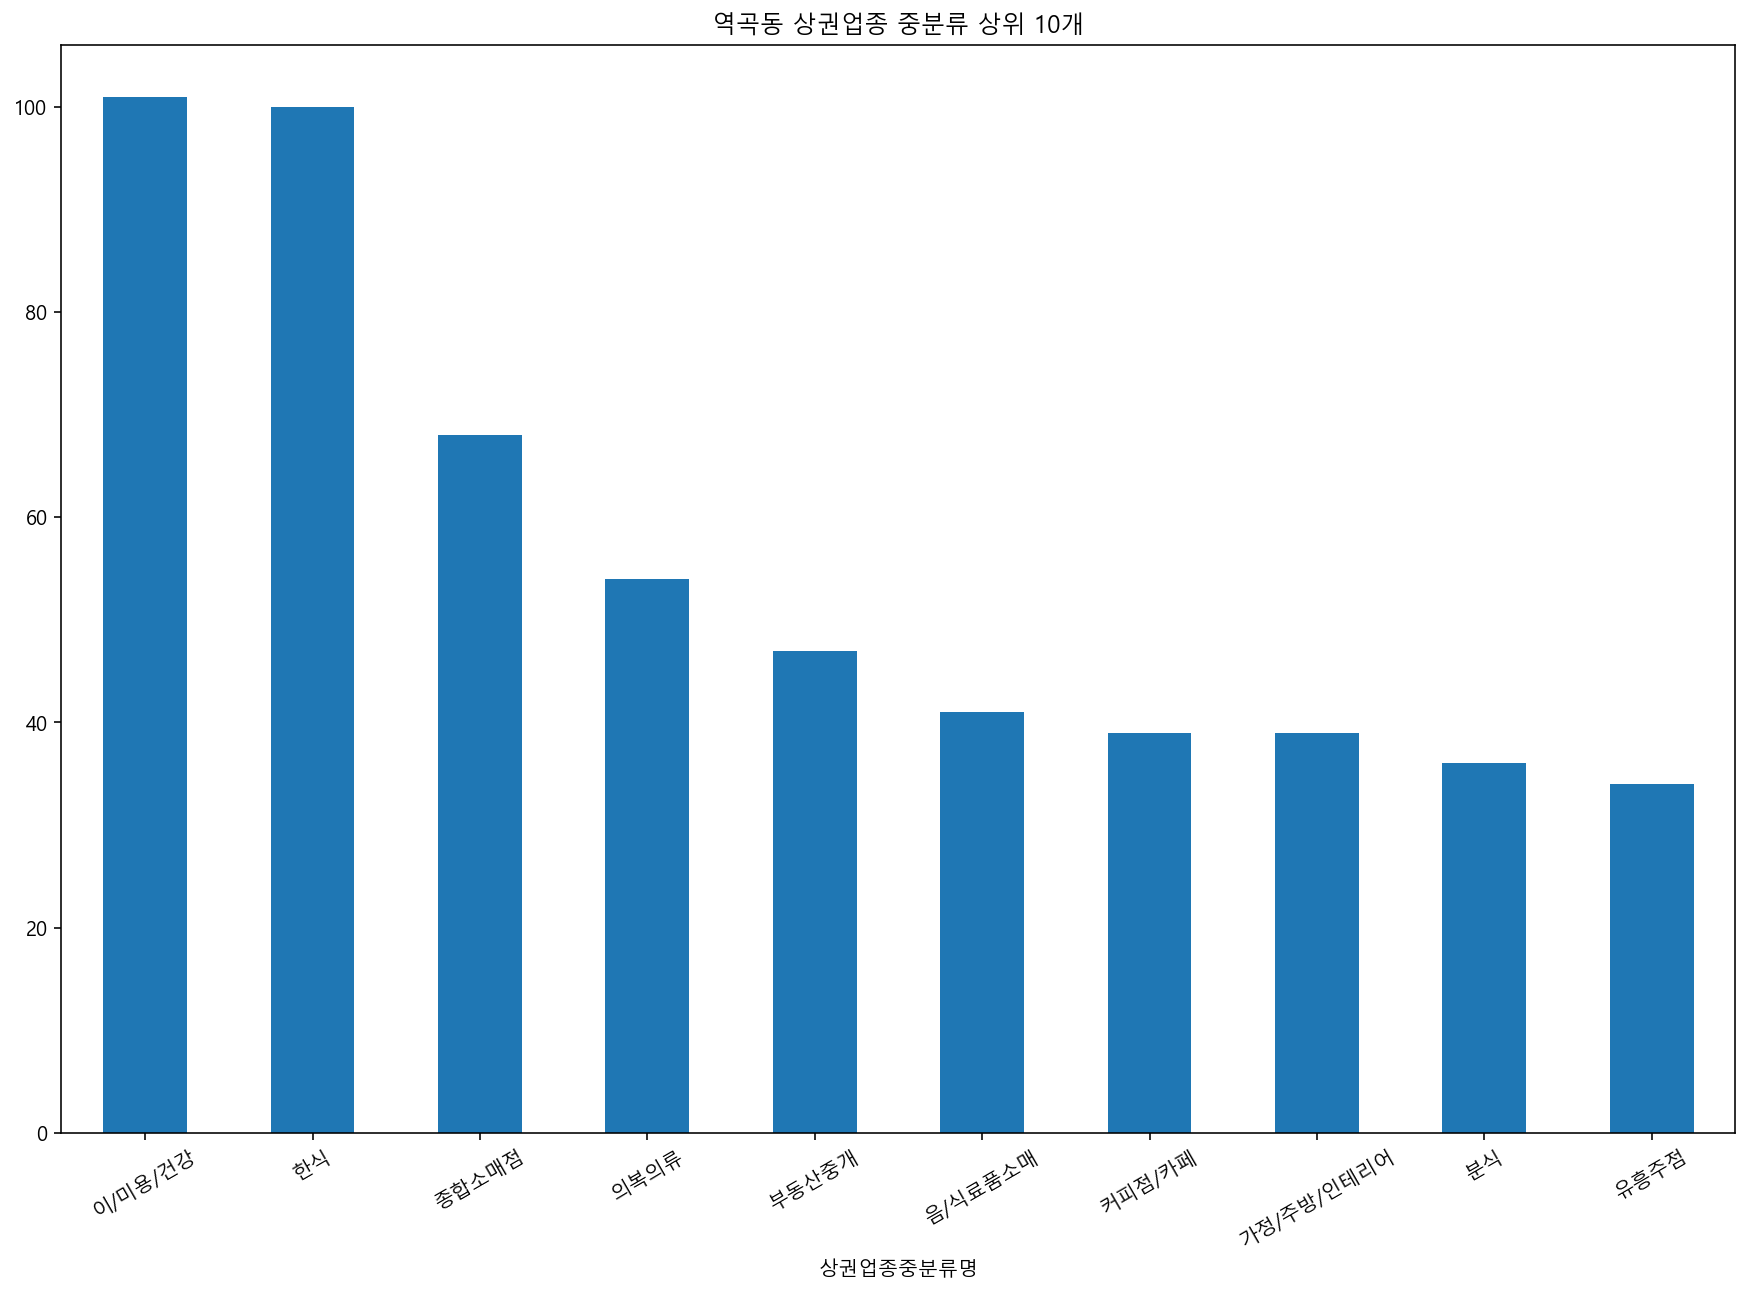

In [119]:
food_y = df_bc.groupby(['동리','상권업종중분류명'])['상호명'].count().copy()
food_y.unstack().loc['역곡동'].sort_values(ascending=False).head(10).plot.bar(figsize=(15,10), rot=30).set_title('역곡동 상권업종 중분류 상위 10개')

Text(0.5, 1.0, '역곡동 상권업종 소분류 상위 10개')

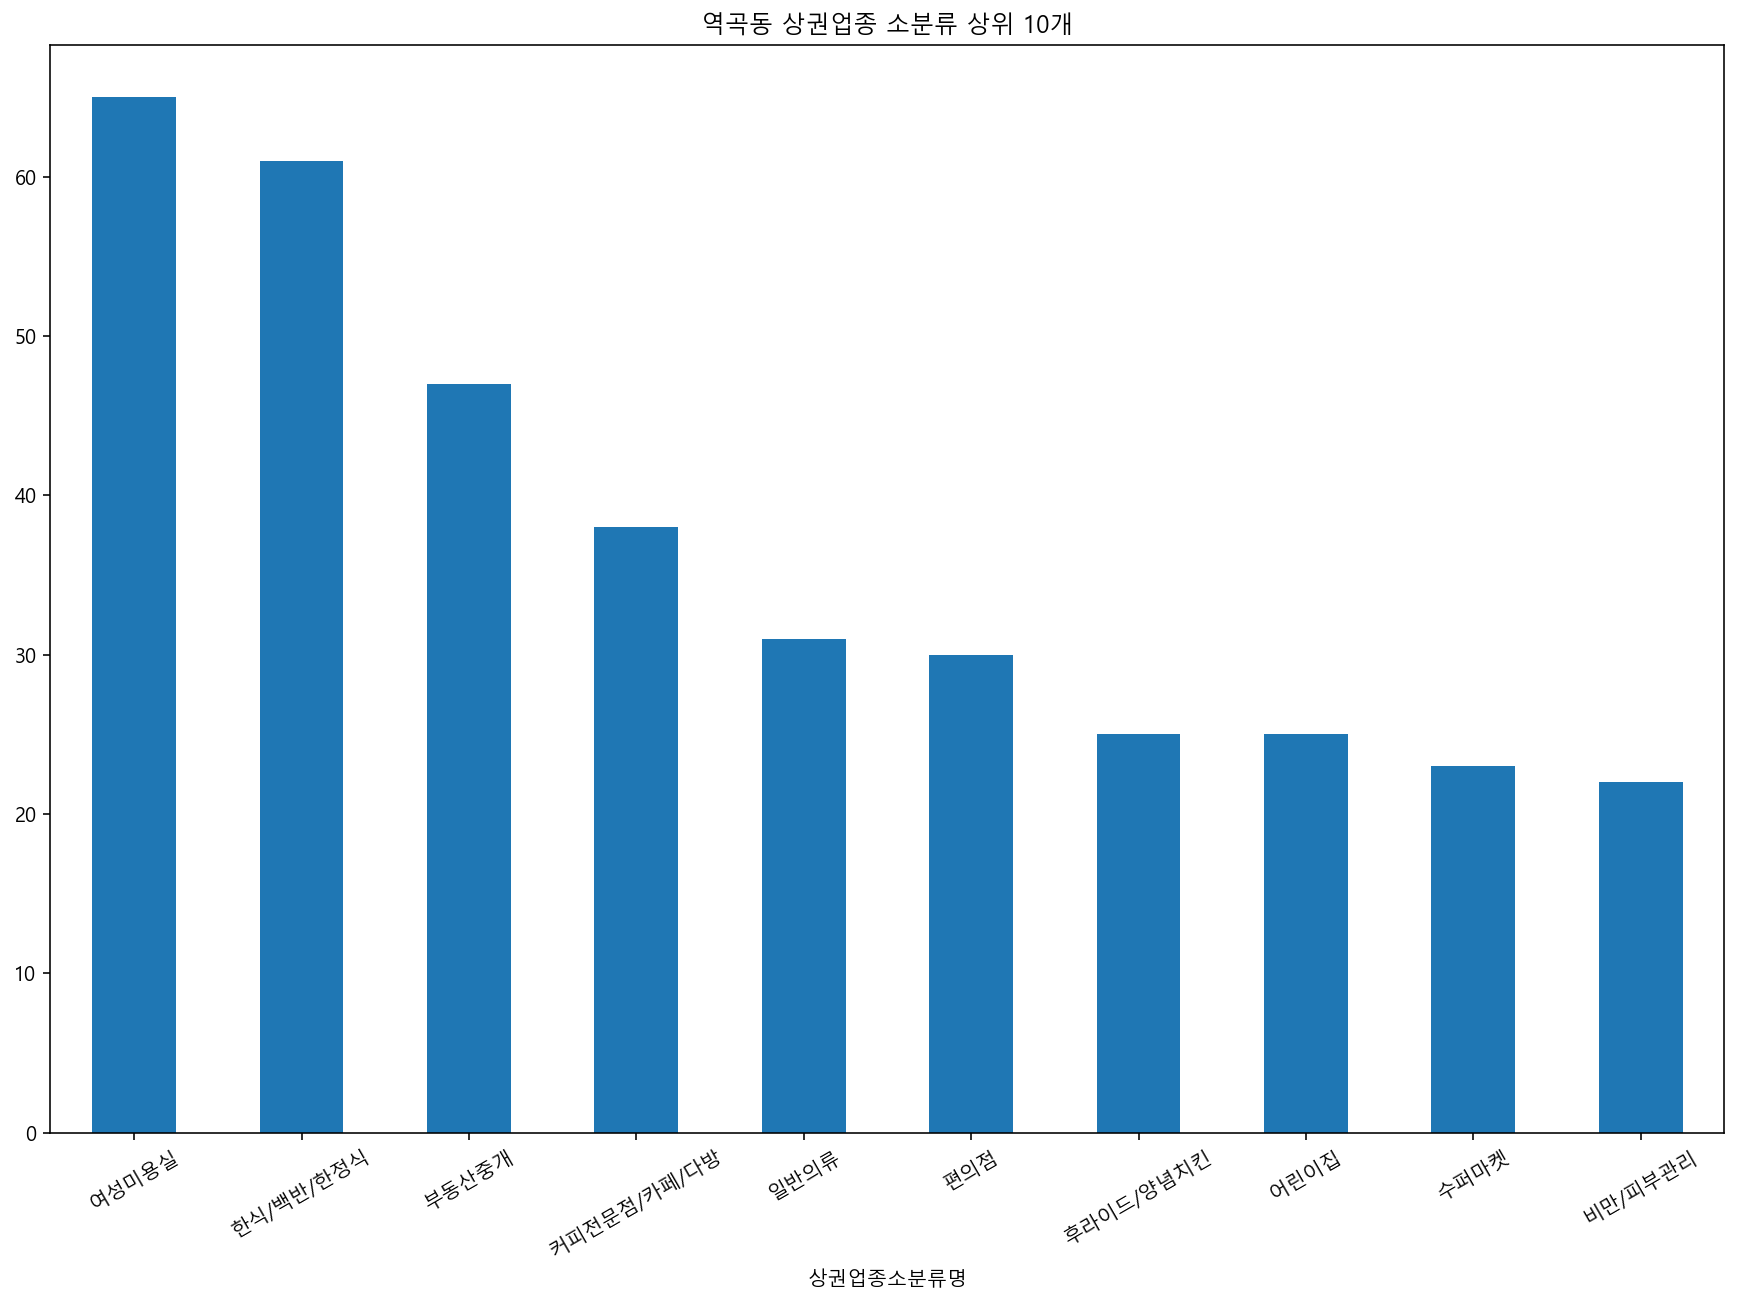

In [120]:
food_y = df_bc.groupby(['동리','상권업종소분류명'])['상호명'].count().copy()
food_y.unstack().loc['역곡동'].sort_values(ascending=False).head(10).plot.bar(figsize=(15,10), rot=30).set_title('역곡동 상권업종 소분류 상위 10개')

In [121]:
df_bc_food = df_g[(df_g['상권업종대분류명'] == '음식') & (df_g['시군'] == '부천시')].copy()

In [122]:
df_bc_food = df_bc_food.reset_index().copy()
df_bc_food = df_bc_food.drop('index', axis=1)
df_bc_food = df_bc_food.drop('구읍면', axis=1)
df_bc_food.head(1)


상가업소번호      상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  27403774  주부토주먹고기  NaN         Q       음식       Q01       한식    Q01A01   

    상권업종소분류명 표준산업분류코드  표준산업분류명  시도코드  시도명  시군구코드 시군구명       행정동코드  행정동명  \
0  한식/백반/한정식   I56111  한식 음식점업    41  경기도  41190  부천시  4119051000  심곡2동   

          법정동코드 법정동명  ...  지번부번지               지번주소         도로명코드  \
0  4.119010e+09  심곡동  ...    9.0  경기도 부천시 심곡동 170-9  411904352134   

               도로명  건물본번지 건물부번지                     건물관리번호  건물명  \
0  경기도 부천시 부천로10번길     33   NaN  4119510200101700009037624  NaN   

                도로명주소     구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  \
0  경기도 부천시 부천로10번길 33  420010.0  14644.0  NaN   1  NaN  126.784834  37.485016   

     도   시군   동리  
0  경기도  부천시  심곡동  

[1 rows x 42 columns]

Text(0.5, 1.0, '역곡동 음식분류 상위 10개')

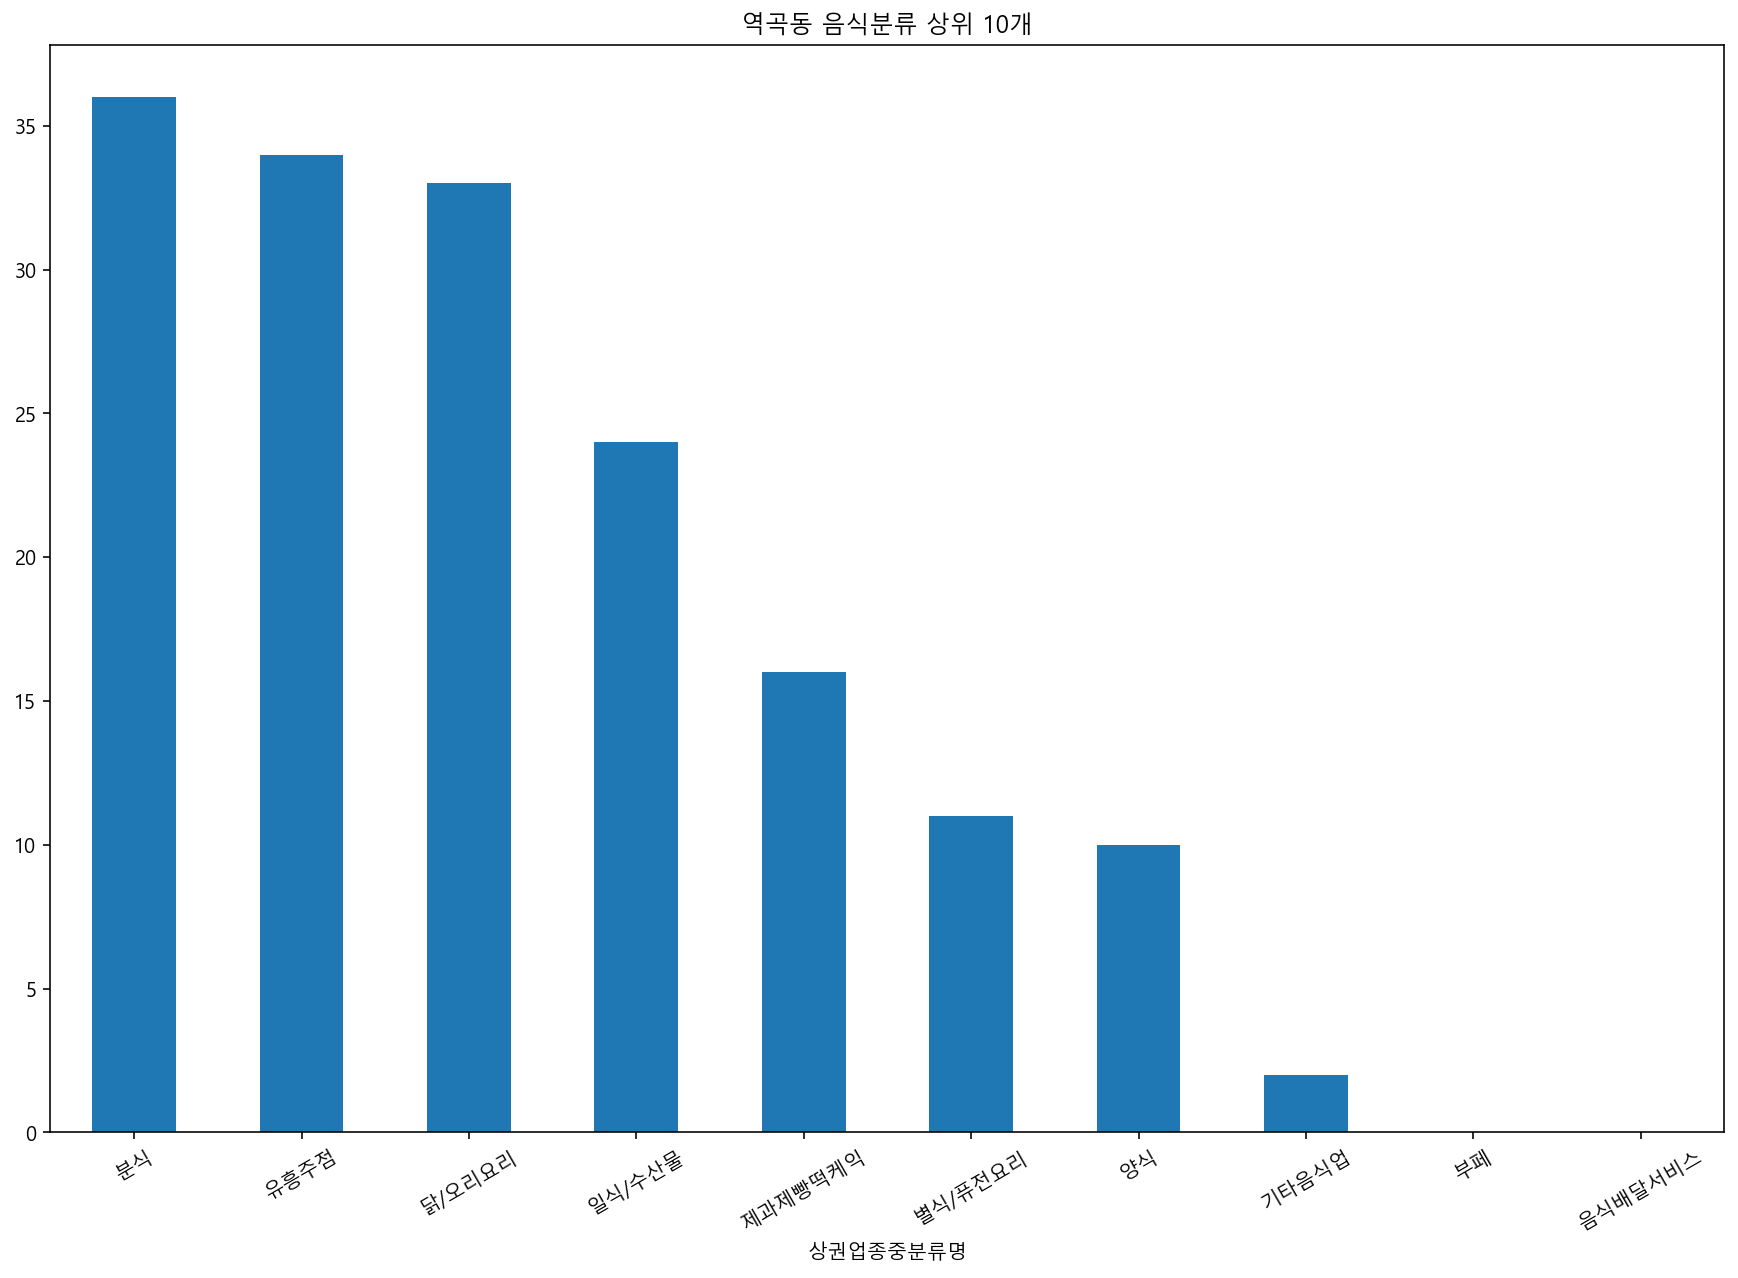

In [150]:
df_bc_food_dong = df_bc_food.groupby(['동리','상권업종중분류명'])['상호명'].count().copy()
df_bc_food_dong.unstack().loc['역곡동'].head(10).sort_values(ascending=False).plot.bar(figsize = (15,10),rot=30).set_title('역곡동 음식분류 상위 10개')

In [124]:
food = df_bc_food_dong.reset_index()
food = food.rename(columns={'상호명':'상호수'})
food.head()

동리 상권업종중분류명  상호수
0  계수동       한식    2
1  고강동   닭/오리요리   19
2  고강동  별식/퓨전요리    3
3  고강동       분식   33
4  고강동     유흥주점   28

## 부천시 동별 학원 비교 시각화

In [206]:
df_bc['상권업종대분류명'].unique()

array(['음식', '소매', '생활서비스', '숙박', '학문/교육', '부동산', '관광/여가/오락', '스포츠'],
      dtype=object)

In [207]:
df_bc_academy = df_bc[df_bc['상권업종소분류명'] == '학원-입시'].copy()

In [213]:
academy_count = df_bc_academy['동리'].value_counts()

In [214]:
academy_10 = academy_count.head(10)
academy_10

중동      208
상동      184
원종동      41
송내동      30
소사본동     26
괴안동      25
심곡동      24
고강동      22
역곡동      21
범박동      20
Name: 동리, dtype: int64

In [215]:
academy_selected = df_bc_academy[
    df_bc_academy['동리'].isin(academy_10.index)].copy()

In [216]:
academy_selected

상가업소번호          상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명  \
888     26558860         영재사관  부천지점         R    학문/교육       R01  학원-보습교습입시   
1644    24952141   프랭클린영어보습학원   NaN         R    학문/교육       R01  학원-보습교습입시   
1655    27590181       한솔보습학원   NaN         R    학문/교육       R01  학원-보습교습입시   
1682    24613776    삼성J&K보습학원   NaN         R    학문/교육       R01  학원-보습교습입시   
1766    24915040    설선생껌수학교습소   NaN         R    학문/교육       R01  학원-보습교습입시   
...          ...          ...   ...       ...      ...       ...        ...   
546739  27157001       써미보습학원   NaN         R    학문/교육       R01  학원-보습교습입시   
547735  26405322  중앙에이플러스보습학원   NaN         R    학문/교육       R01  학원-보습교습입시   
548779  26003657     GM개념원리수학   NaN         R    학문/교육       R01  학원-보습교습입시   
550545  17199288     제니영어수학과외   NaN         R    학문/교육       R01  학원-보습교습입시   
550599  17198175      삼삼수학교습소   NaN         R    학문/교육       R01  학원-보습교습입시   

       상권업종소분류코드 상권업종소분류명 표준산업분류코드   표준산업분류명  시도코드  시도명  시군구코드 시군구명  \
888       R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   
1644      R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   
1655      R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   
1682      R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   
1766      R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   
...          ...      ...      ...       ...   ...  ...    ...  ...   
546739    R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   
547735    R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   
548779    R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   
550545    R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   
550599    R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   

             행정동코드   행정동명         법정동코드  법정동명  ...                지번주소  \
888     4119066000    중1동  4.119011e+09    중동  ...   경기도 부천시 중동 1131-3   
1644    4119076000  소사본3동  4.119011e+09  소사본동  ...  경기도 부천시 소사본동 409-6   
1655    4119066000    중1동  4.119011e+09    중동  ...  경기도 부천시 중동 1147-12   
1682    4119074000   송내2동  4.119011e+09   송내동  ...   경기도 부천시 송내동 614-3   
1766    4119069000    상2동  4.119011e+09    상동  ...    경기도 부천시 상동 571-6   
...            ...    ...           ...   ...  ...                 ...   
546739  4119066000    중1동  4.119011e+09    중동  ...     경기도 부천시 중동 1129   
547735  4119070000    상3동  4.119011e+09    상동  ...    경기도 부천시 상동 533-8   
548779  4119069000    상2동  4.119011e+09    상동  ...    경기도 부천시 상동 542-3   
550545  4119074400     상동  4.119011e+09    상동  ...    경기도 부천시 상동 500-2   
550599  4119079500    범안동  4.119011e+09   범박동  ...   경기도 부천시 범박동 155-1   

               도로명코드                도로명  건물본번지  건물부번지  \
888     411903185020        경기도 부천시 신흥로    167    NaN   
1644    411904355169   경기도 부천시 소사동로72번길     17    NaN   
1655    411904352521   경기도 부천시 중동로254번길     35    NaN   
1682    411903185006        경기도 부천시 성주로    120    NaN   
1766    411903000066        경기도 부천시 부흥로     49    NaN   
...              ...                ...    ...    ...   
546739  411904352475  경기도 부천시 조마루로285번길     34    NaN   
547735  411904352242   경기도 부천시 상동로117번길     31    NaN   
548779  411903184004        경기도 부천시 상동로     78    NaN   
550545  411903184004        경기도 부천시 상동로    186    NaN   
550599  411904355107    경기도 부천시 범안로95번길     16    NaN   

                           건물관리번호           건물명                 도로명주소  \
888     4119510800111310003035330          신영빌딩       경기도 부천시 신흥로 167   
1644    4119710100104090006046690         아크리아Ⅲ   경기도 부천시 소사동로72번길 17   
1655    4119510800111470012016230        베스트몰빌딩   경기도 부천시 중동로254번길 35   
1682    4119710500106140003006080           NaN       경기도 부천시 성주로 120   
1766    4119510900105710005036624     백송마을풍림아이원        경기도 부천시 부흥로 49   
...                           ...           ...                   ...   
546739  4119510800111290000045229        이스트타워원  경기도 부천시 조마루로285번길 34   
547735  4119510900105330008033753          대림타운   

In [229]:
g = academy_selected.groupby(['동리'])['상호명'].count()
g = g.reset_index()
g = g.rename(columns={'상호명':'상호수'})

Text(0.5, 1.0, '부천시 입시학원 상위10개 동별 비교')

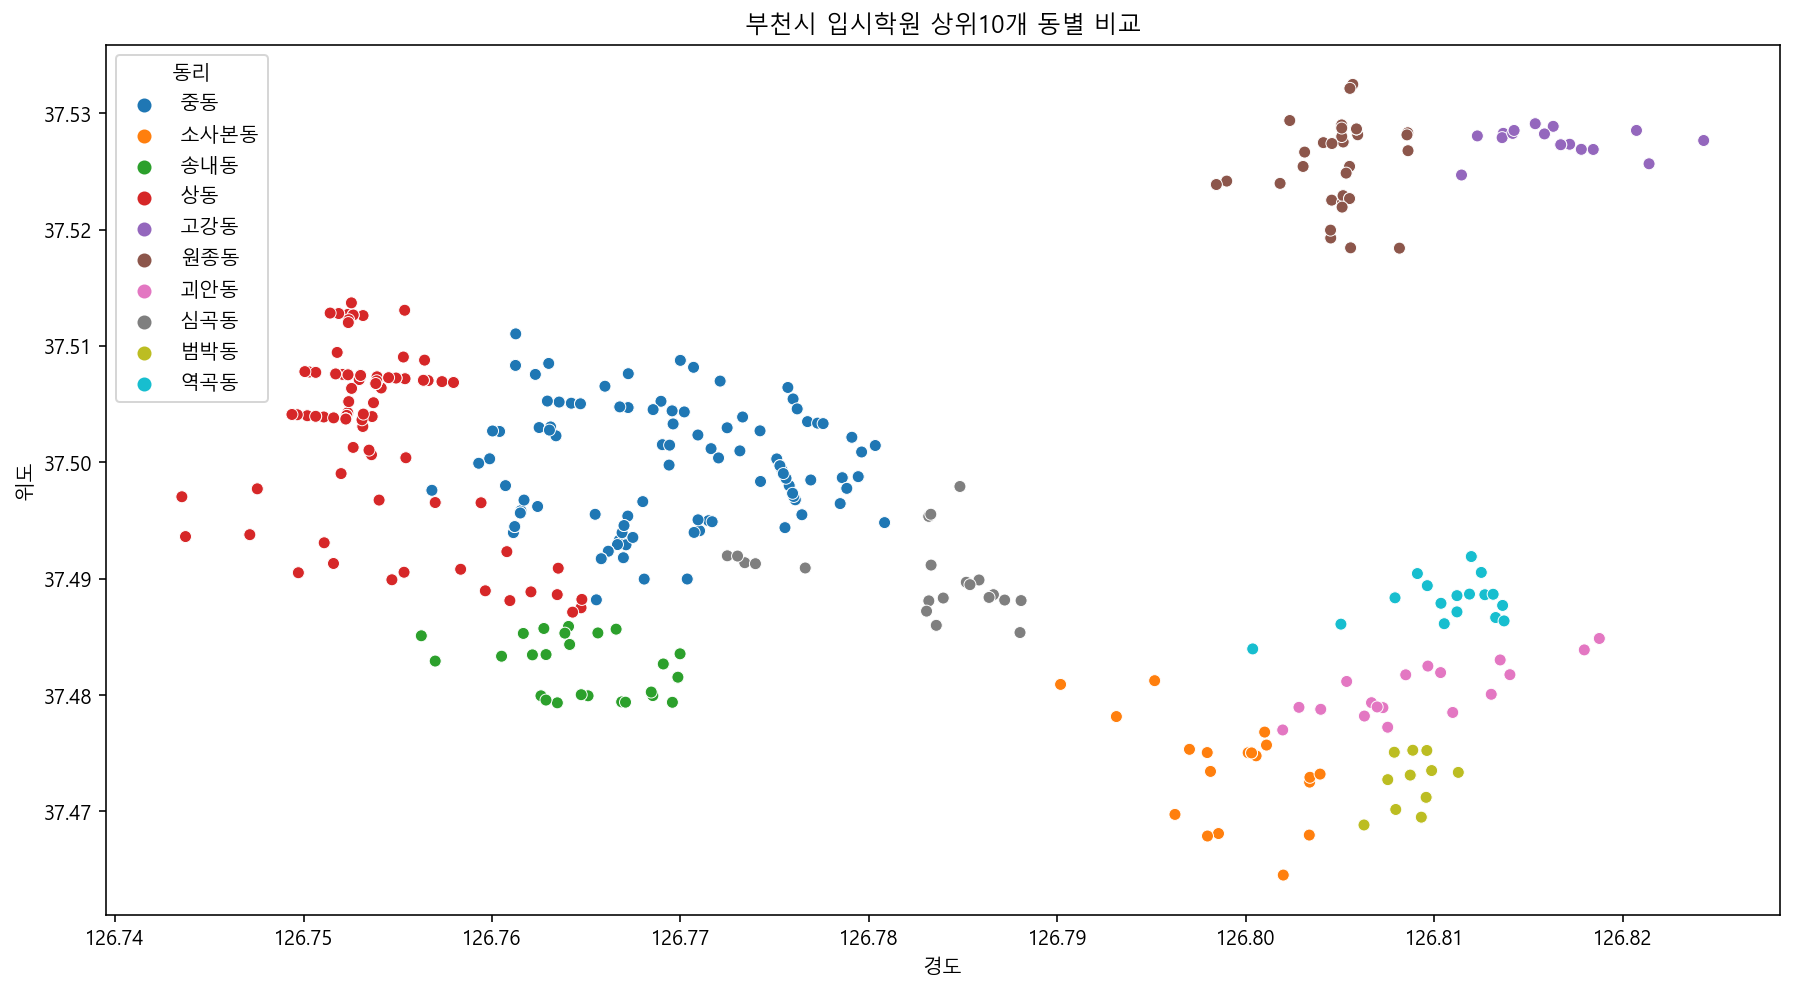

In [237]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=academy_selected, x = '경도', y = '위도', hue='동리').set_title('부천시 입시학원 상위10개 동별 비교')

In [248]:
df_bc['상권업종중분류명'].unique()

array(['한식', '운동/경기용품소매', '대중목욕탕/휴게', '분식', '기타판매업', '자동차/이륜차', '종합소매점',
       '닭/오리요리', '철물/난방/건설자재소매', '모텔/여관/여인숙', '커피점/카페', '사무/문구/컴퓨터',
       '건강/미용식품', '음/식료품소매', '의약/의료품소매', '학문교육기타', '패스트푸드', '의복의류',
       '사진/광학/정밀기기소매', '이/미용/건강', '세탁/가사서비스', '책/서적/도서', '선물/팬시/기념품',
       '유흥주점', '사진', '화장품소매', '중식', '가방/신발/액세서리', '학원-보습교습입시', '부동산중개',
       '제과제빵떡케익', 'PC/오락/당구/볼링등', '무도/유흥/가무', '학원-음악미술무용', '유아교육', '주택수리',
       '주유소/충전소', '학원-예능취미체육', '가정/주방/인테리어', '시계/귀금속소매', '운송/배달/택배',
       '가구소매', '요가/단전/마사지', '학원-컴퓨터', '취미/오락관련소매', '자동차/자동차용품', '학원기타',
       '양식', '일식/수산물', '가전제품소매', '대행업', '학원-어학', '인력/고용/용역알선', '기타서비스업',
       '별식/퓨전요리', '개인서비스', '광고/인쇄', '도서관/독서실', '예식/의례/관혼상제', '유아용품',
       '호텔/콘도', '중고품소매/교환', '종교용품판매', '경마/경륜/성인오락', '학원-자격/국가고시',
       '개인/가정용품수리', '예술품/골동품/수석/분재', '장례/묘지', '부페', '페인트/유리제품소매',
       '물품기기대여', '법무세무회계', '연극/영화/극장', '애견/애완/동물', '기타음식업', '실내운동시설',
       '행사/이벤트', '분양', '학원-창업취업취미', '스포츠/운동', '평가/개발/관리', '운영관리시설',
       '음식배달서비스', '놀

Text(0.5, 1.0, '부천시 학원, 도서관 독서실 위치 분포')

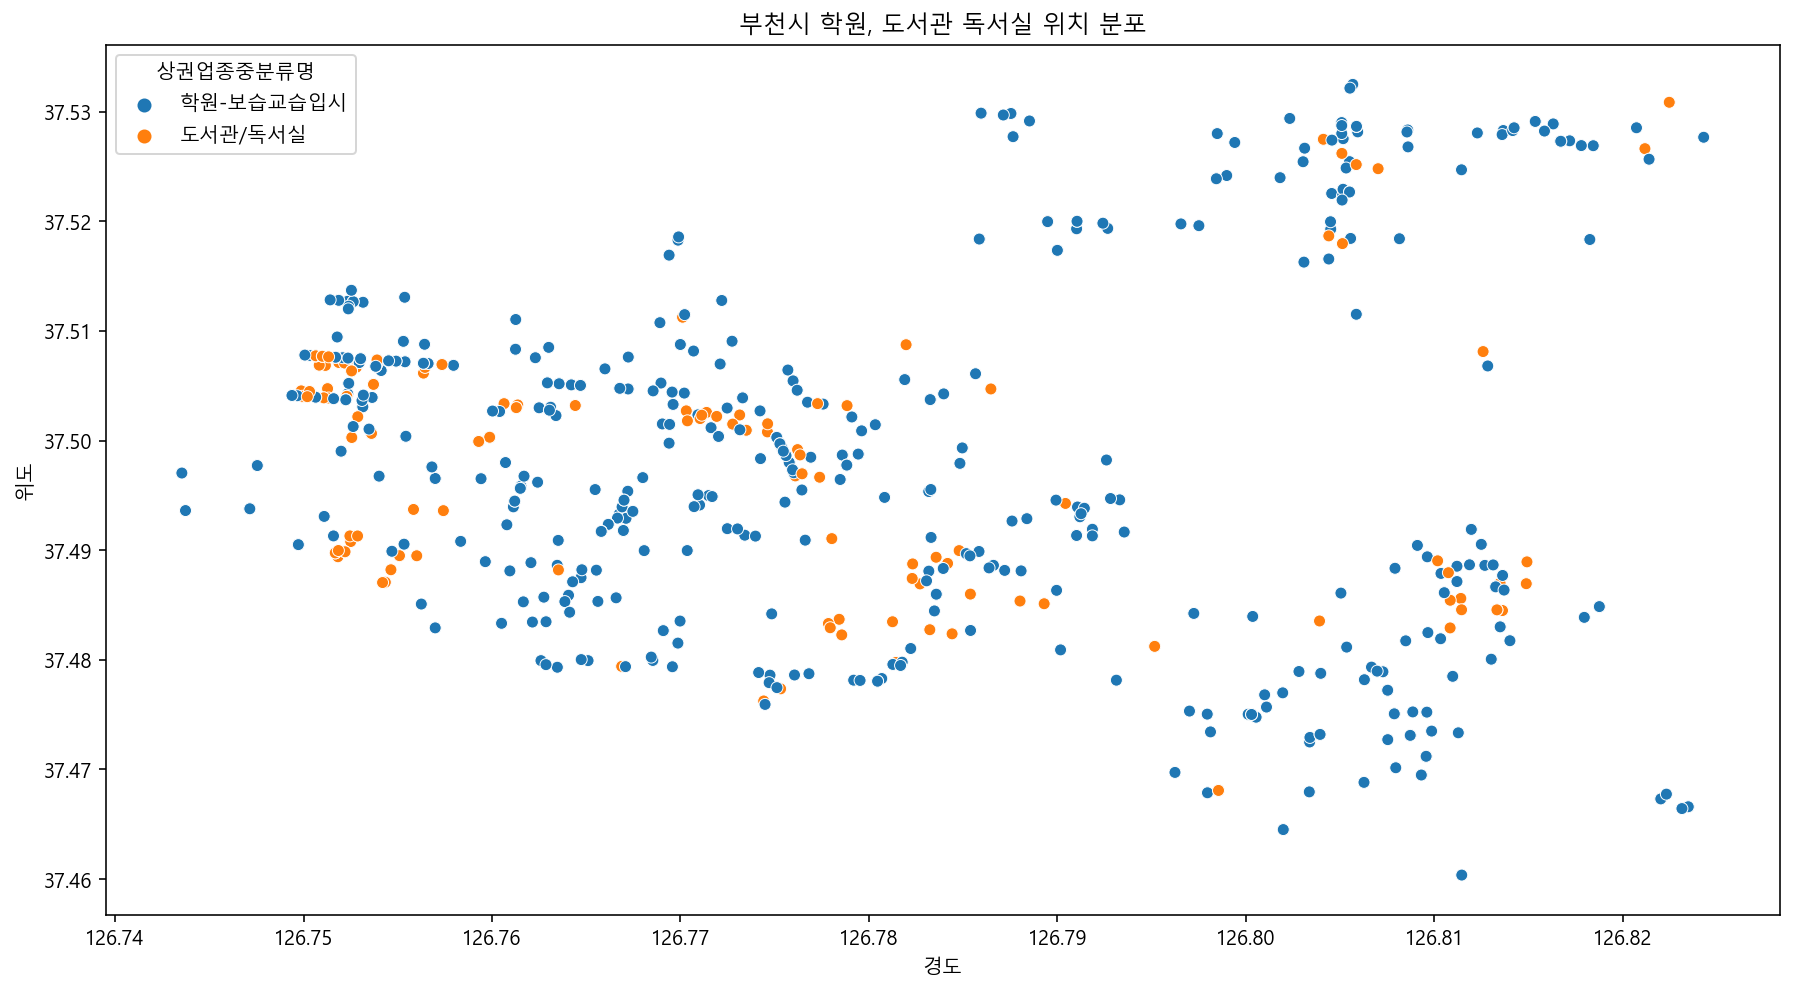

In [251]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_bc[df_bc['상권업종중분류명'].isin(['학원-보습교습입시','도서관/독서실'])]
                                                  ,x = '경도', y = '위도', hue='상권업종중분류명').set_title('부천시 학원, 도서관 독서실 위치 분포')

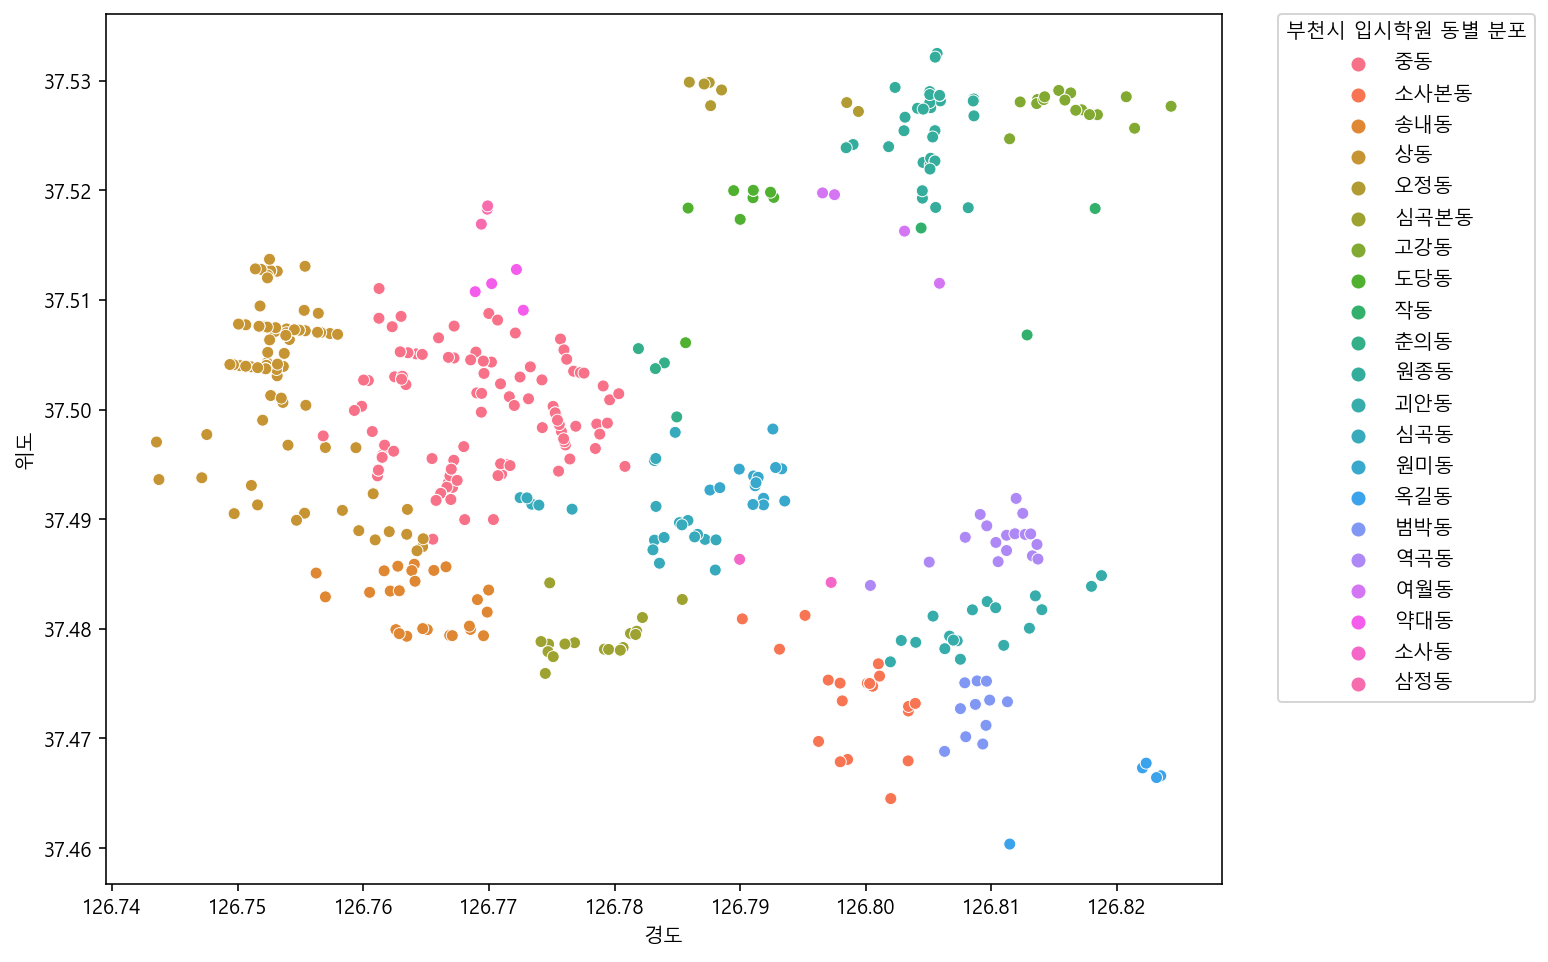

## folium 사용해서 지도에 역곡동 독서실 입시학원 찍어보기

In [256]:
df_bc_study = df_bc[df_bc['상권업종중분류명'].isin(['학원-보습교습입시','도서관/독서실'])].copy()

In [257]:
df_bc_study.head(1)

상가업소번호   상호명   지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명 상권업종소분류코드  \
888  26558860  영재사관  부천지점         R    학문/교육       R01  학원-보습교습입시    R01A01   

    상권업종소분류명 표준산업분류코드   표준산업분류명  시도코드  시도명  시군구코드 시군구명       행정동코드 행정동명  \
888    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시  4119066000  중1동   

            법정동코드 법정동명  ...               지번주소         도로명코드          도로명  \
888  4.119011e+09   중동  ...  경기도 부천시 중동 1131-3  411903185020  경기도 부천시 신흥로   

     건물본번지  건물부번지                     건물관리번호   건물명            도로명주소     구우편번호  \
888    167    NaN  4119510800111310003035330  신영빌딩  경기도 부천시 신흥로 167  420020.0   

       신우편번호  동정보  층정보 호정보          경도         위도    도   시군   구읍면  동리  
888  14580.0  601  NaN  60  126.776915  37.498477  경기도  부천시  None  중동  

[1 rows x 43 columns]

In [261]:
n = df_bc_study.isnull().sum()
n.sort_values(ascending=False).head(9)

구읍면      842
건물부번지    770
지점명      746
동정보      685
호정보      513
층정보      349
건물명      233
지번부번지    172
행정동명      20
dtype: int64

In [262]:
n = df_bc_study.isnull().sum()
not_use = n.sort_values(ascending=False).head(9)
not_use_cols = not_use.index

In [263]:
df_bc_study = df_bc_study.drop(not_use_cols, axis = 1)

In [264]:
df_bc_study

상가업소번호         상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명  \
888     26558860        영재사관         R    학문/교육       R01  학원-보습교습입시   
1644    24952141  프랭클린영어보습학원         R    학문/교육       R01  학원-보습교습입시   
1655    27590181      한솔보습학원         R    학문/교육       R01  학원-보습교습입시   
1682    24613776   삼성J&K보습학원         R    학문/교육       R01  학원-보습교습입시   
1766    24915040   설선생껌수학교습소         R    학문/교육       R01  학원-보습교습입시   
...          ...         ...       ...      ...       ...        ...   
550599  17198175     삼삼수학교습소         R    학문/교육       R01  학원-보습교습입시   
552393  17219076       오픈하우스         R    학문/교육       R10    도서관/독서실   
552674  17216760       쉐어데스크         R    학문/교육       R10    도서관/독서실   
552765  17244342      아이비원룸텔         R    학문/교육       R10    도서관/독서실   
554158  17230338    극한의자습독서실         R    학문/교육       R10    도서관/독서실   

       상권업종소분류코드 상권업종소분류명 표준산업분류코드   표준산업분류명  시도코드  시도명  시군구코드 시군구명  \
888       R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   
1644      R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   
1655      R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   
1682      R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   
1766      R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   
...          ...      ...      ...       ...   ...  ...    ...  ...   
550599    R01A01    학원-입시   P85501  일반 교과 학원    41  경기도  41190  부천시   
552393    R10A02      고시원   R90212   독서실 운영업    41  경기도  41190  부천시   
552674    R10A01      독서실   R90212   독서실 운영업    41  경기도  41190  부천시   
552765    R10A02      고시원   R90212   독서실 운영업    41  경기도  41190  부천시   
554158    R10A01      독서실   R90212   독서실 운영업    41  경기도  41190  부천시   

             행정동코드         법정동코드  법정동명                 지번코드  대지구분코드 대지구분명  \
888     4119066000  4.119011e+09    중동  4119010800111310003       1    대지   
1644    4119076000  4.119011e+09  소사본동  4119011000104090006       1    대지   
1655    4119066000  4.119011e+09    중동  4119010800111470012       1    대지   
1682    4119074000  4.119011e+09   송내동  4119011400106140003       1    대지   
1766    4119069000  4.119011e+09    상동  4119010900205710006       1    대지   
...            ...           ...   ...                  ...     ...   ...   
550599  4119079500  4.119011e+09   범박동  4119011200201550001       1    대지   
552393  4119079500  4.119011e+09   괴안동  4119011300201130003       1    대지   
552674  4119074400  4.119011e+09    상동  4119010900204010000       1    대지   
552765  4119074400  4.119011e+09    상동  4119010900205330007       1    대지   
554158  4119074400  4.119011e+09    상동  4119010900205340006       1    대지   

        지번본번지                지번주소         도로명코드               도로명  건물본번지  \
888      1131   경기도 부천시 중동 1131-3  411903185020       경기도 부천시 신흥로    167   
1644      409  경기도 부천시 소사본동 409-6  411904355169  경기도 부천시 소사동로72번길     17   
1655     1147  경기도 부천시 중동 1147-12  411904352521  경기도 부천시 중동로254번길     35   
1682      614   경기도 부천시 송내동 614-3  411903185006       경기도 부천시 성주로    120   
1766      571    경기도 부천시 상동 571-6  411903000066       경기도 부천시 부흥로     49   
...       ...                 ...           ...               ...    ...   
550599    155   경기도 부천시 범박동 155-1  411904355107   경기도 부천시 범안로95번길     16   
552393    113   경기도 부천시 괴안동 113-3  411903000028       경기도 부천시 경인로    507   
552674    401      경기도 부천시 상동 401  411903184006       경기도 부천시 상일로     96   
552765    533    경기도 부천시 상동 533-7  411904352242  경기도 부천시 상동로117번길     37   
554158    534    경기도 부천시 상동 534-6  411903000065       경기도 부천시 길주로     91   

                           건물관리번호                도로명주소     구우편번호    신우편번호  \
888     4119510800111310003035330      경기도 부천시 신흥로 167  420020.0  14580.0   
1644    4119710100104090006046690  경기도 부천시 소사동로72번길 17  422230.0  14772.0   
1655    4119510800111470012016230  경기도 부천시 중동로254번길 35  420020.0  14548.0   
1682    4119710500106140003006080      경기도 부천시 성주로 120  422040.0  14746.0   
1766    4119510900105710005036624       경기도 부천시 부흥로 49  420762.0  145

In [298]:
long = df_bc_study['경도'].mean()
lat = df_bc_study['위도'].mean()
long

126.77616096917671

In [288]:
m = folium.Map(location=[lat,long], zoom_start = 13)
folium.Marker([37.498477, 126.776915], tooltip = '영재사관').add_to(m)
m

In [289]:
df_bc_study_y = df_bc_study[df_bc_study['동리'] == '역곡동']

In [300]:
m = folium.Map(location=[lat, long], zoom_start=13)

for i in df_bc_study.index:
    tooltip = df_bc_study.loc[i, "상호명"] +"-"+ df_bc_study.loc[i, "도로명주소"]
    lat = df_bc_study.loc[i, "위도"]
    long = df_bc_study.loc[i, "경도"]
    
    folium.CircleMarker([lat, long], tooltip=tooltip, radius=5).add_to(m)

m

# 프랜차이즈 입점 분석 버거킹 vs 맥도날드

## 데이터 전처리

In [343]:
df_g = pd.read_csv(r'C:\Users\pjk\Documents\Data_set\Jupyter_data\소상공인시장진흥공단_상가(상권)정보_경기_202012.csv', sep='|')

In [344]:
n = df_g.isnull().sum()

In [345]:
not_use = n.sort_values(ascending=False)
not_use

동정보          499533
지점명          470532
건물부번지        450104
호정보          419658
건물명          303581
층정보          291094
지번부번지        150956
표준산업분류코드      34629
표준산업분류명       34629
행정동명           6139
구우편번호          1437
법정동코드           132
법정동명            132
신우편번호            10
상호명               1
시도코드              0
위도                0
상권업종대분류명          0
상권업종소분류명          0
상권업종소분류코드         0
상권업종중분류명          0
상권업종중분류코드         0
시군구코드             0
상권업종대분류코드         0
시도명               0
지번코드              0
시군구명              0
행정동코드             0
경도                0
대지구분코드            0
대지구분명             0
지번본번지             0
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물관리번호            0
도로명주소             0
상가업소번호            0
dtype: int64

In [346]:
not_use_cols = not_use.head(10).index

In [347]:
df_g = df_g.drop(not_use_cols, axis = 1).copy()

In [348]:
df_g

상가업소번호        상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0       20555125         아싸         Q       음식       Q03   일식/수산물    Q03A19   
1       17175325       뱅이술술         Q       음식       Q01       한식    Q01A01   
2       17175337    마운틴한식뷔폐         Q       음식       Q01       한식    Q01A01   
3       20713599    눈높이러닝센타         R    학문/교육       R13   학문교육기타    R13A01   
4       20642964       유니베라         D       소매       D16    화장품소매    D16A01   
...          ...        ...       ...      ...       ...      ...       ...   
556888  17223578  스튜디오온마이웨이         F    생활서비스       F06       사진    F06A01   
556889  17223588     스튜디오앞북         F    생활서비스       F06       사진    F06A01   
556890  17223705  진덴트칼라외형복원         F    생활서비스       F06       사진    F06A01   
556891  17223572     스튜디오르민         F    생활서비스       F06       사진    F06A01   
556892  17223715     판다스튜디오         F    생활서비스       F06       사진    F06A01   

         상권업종소분류명  시도코드  시도명  시군구코드     시군구명       행정동코드         법정동코드  법정동명  \
0            홍어전문    41  경기도  41461  용인시 처인구  4146125000  4.146125e+09   포곡읍   
1       한식/백반/한정식    41  경기도  41173  안양시 동안구  4117356600  4.117310e+09   관양동   
2       한식/백반/한정식    41  경기도  41171  안양시 만안구  4117152000  4.117110e+09   안양동   
3           학습지보급    41  경기도  41210      광명시  4121054000  4.121010e+09   광명동   
4          화장품판매점    41  경기도  41463  용인시 기흥구  4146356000  4.146311e+09   언남동   
...           ...   ...  ...    ...      ...         ...           ...   ...   
556888        사진관    41  경기도  41465  용인시 수지구  4146551000  4.146510e+09  풍덕천동   
556889        사진관    41  경기도  41465  용인시 수지구  4146553000  4.146510e+09   신봉동   
556890        사진관    41  경기도  41465  용인시 수지구  4146555000  4.146510e+09   죽전동   
556891        사진관    41  경기도  41465  용인시 수지구  4146557000  4.146511e+09   상현동   
556892        사진관    41  경기도  41465  용인시 수지구  4146559000  4.146511e+09   성복동   

                       지번코드  대지구분코드 대지구분명  지번본번지                        지번주소  \
0       4146125027201910022       1    대지    191  경기도 용인시 처인구 포곡읍 전대리 191-22   
1       4117310200216020006       1    대지   1602      경기도 안양시 동안구 관양동 1602-6   
2       4117110100208370001       1    대지    837       경기도 안양시 만안구 안양동 837-1   
3       4121010100201490006       1    대지    149           경기도 광명시 광명동 149-6   
4       4146311200203740000       1    대지    374         경기도 용인시 기흥구 언남동 374   
...                     ...     ...   ...    ...                         ...   
556888  4146510100212230000       1    대지   1223       경기도 용인시 수지구 풍덕천동 1223   
556889  4146510500208730000       1    대지    873         경기도 용인시 수지구 신봉동 873   
556890  4146510200211110000       1    대지   1111        경기도 용인시 수지구 죽전동 1111   
556891  4146510700200960001       1    대지     96        경기도 용인시 수지구 상현동 96-1   
556892  4146510600207710000       1    대지    771         경기도 용인시 수지구 성복동 771   

               도로명코드                      도로명  건물본번지  \
0       414614409732  경기도 용인시 처인구 포곡읍 전대로78번길     13   
1       411734349080     경기도 안양시 동안구 관평로182번길     23   
2       411713182016          경기도 안양시 만안구 안양로    405   
3       412103000022              경기도 광명시 오리로    946   
4       414634412059      경기도 용인시 기흥구 구성로64번길      1   
...              ...                      ...    ...   
556888  414654415165    경기도 용인시 수지구 풍덕천로171번길      9   
556889  414653205015         경기도 용인시 수지구 신봉2로     26   
556890  414654415118   경기도 용인시 수지구 용구대로2771번길     88   
556891  414654415082      경기도 용인시 수지구 수지로78번길     18   
556892  414653205009         경기도 용인시 수지구 성복1로     91   

                           건물관리번호                         도로명주소     구우편번호  \
0       4146125027101910022035121  경기도 용인시 처인구 포곡읍 전대로78번길 13-1  449815.0   
1       4117310200116020006007279       경기도 안양시 동안구 관평로182번길 23  431815.0   
2       4117110100108370001006476           경기도 안양시 만안구 안양로 405  430840.0   
3       4121010100101490006003352               경기도 광명시 오리로 946  423010.0   
4       4146311200103740000023783         경기도 용인시 기흥구 구성로64번길 1  446525.0   
... 

In [349]:
df_bc

상가업소번호        상호명    지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드   상권업종중분류명  \
36      27403774    주부토주먹고기    NaN         Q       음식       Q01         한식   
63      22196584     삼천리자전거  원종대리점         D       소매       D14  운동/경기용품소매   
92      23007918      화성목욕탕    NaN         F    생활서비스       F09   대중목욕탕/휴게   
102     20411380         홈쿡    NaN         Q       음식       Q04         분식   
122     15644835       복권천국    NaN         D       소매       D25      기타판매업   
...          ...        ...    ...       ...      ...       ...        ...   
556737  17228639       야한곱창    NaN         Q       음식       Q01         한식   
556738  17228646     소곱창히어로    상동점         Q       음식       Q01         한식   
556753  17232260      혜야사진관    NaN         F    생활서비스       F06         사진   
556808  17218883    상동수제도너츠    NaN         Q       음식       Q07      패스트푸드   
556809  17216498  송사부수제쌀고로케  신중동역점         Q       음식       Q07      패스트푸드   

       상권업종소분류코드   상권업종소분류명 표준산업분류코드            표준산업분류명  시도코드  시도명  시군구코드  \
36        Q01A01  한식/백반/한정식   I56111            한식 음식점업    41  경기도  41190   
63        D14A03      자전거판매   G47632  자전거 및 기타 운송장비 소매업    41  경기도  41190   
92        F09A01     욕탕업-종합   S96121                욕탕업    41  경기도  41190   
102       Q04A01     라면김밥분식   I56194        분식 및 김밥 전문점    41  경기도  41190   
122       D25A02       복권판매   R91241         복권발행 및 판매업    41  경기도  41190   
...          ...        ...      ...                ...   ...  ...    ...   
556737    Q01A03   곱창/양구이전문   I56111            한식 음식점업    41  경기도  41190   
556738    Q01A03   곱창/양구이전문   I56111            한식 음식점업    41  경기도  41190   
556753    F06A01        사진관   M73301  인물사진 및 행사용비디오 촬영업    41  경기도  41190   
556808    Q07A06      도너츠전문   I56191               제과점업    41  경기도  41190   
556809    Q07A06      도너츠전문   I56191               제과점업    41  경기도  41190   

       시군구명       행정동코드  행정동명         법정동코드  법정동명  ...         도로명코드  \
36      부천시  4119051000  심곡2동  4.119010e+09   심곡동  ...  411904352134   
63      부천시  4119085000   NaN  4.119012e+09   원종동  ...  411903012096   
92      부천시  4119083000   오정동  4.119012e+09   오정동  ...  411904358086   
102     부천시  4119066000   중1동  4.119011e+09    중동  ...  411903000065   
122     부천시  4119082000  고강1동  4.119012e+09   고강동  ...  411904358022   
...     ...         ...   ...           ...   ...  ...           ...   
556737  부천시  4119060300   심곡동  4.119010e+09   심곡동  ...  411903184014   
556738  부천시  4119074400    상동  4.119011e+09    상동  ...  411904352495   
556753  부천시  4119075000  소사본동  4.119011e+09  소사본동  ...  411904355180   
556808  부천시  4119061000    중동  4.119011e+09    상동  ...  411904352445   
556809  부천시  4119074200   신중동  4.119011e+09    중동  ...  411904352475   

                      도로명 건물본번지  건물부번지                     건물관리번호         건물명  \
36        경기도 부천시 부천로10번길    33    NaN  4119510200101700009037624         NaN   
63            경기도 부천시 소사로   779    NaN  4119910400102290008035452      뉴월드프라자   
92      경기도 부천시 부천로476번나길    55    NaN  4119910100105570017019311         NaN   
102           경기도 부천시 길주로   180    NaN  4119510800111640000008338  현대백화점부천중동점   
122       경기도 부천시 고강로92번길    41    NaN  4119910500103180000003771      고강제일시장   
...                   ...   ...    ...                        ...         ...   
556737        경기도 부천시 장말로   310    NaN  4119510200103270000006904         NaN   
556738   경기도 부천시 조마루로97번길    33   10.0  4119510900105640006032663         NaN   
556753   경기도 부천시 소사로148번길    57    NaN  4119710100102200060046213         NaN   
556808   경기도 부천시 장말로200번길    19    NaN  4119510900102370000002884         NaN   
556809  경기도 부천시 조마루로285번길    40    NaN  4119510800111340004034430    굿모닝로얄프라자   

                         도로명주소     구우편번호    신우편번호  동정보  층정보  호정보          경도  \
36          경기도 부천시 부천로10번길 33  420010.0  14644.0  NaN    1  NaN  126.784834   
63             경기도 부천시 소사로 779  421200.0  14427.0  NaN    1  NaN  126.804539   
92        경기도 부천시 부천로476번나길 55  421815.0  14436.0  NaN  NaN  NaN  126.

In [350]:
df_bc['동리'].unique()

array(['심곡동', '원종동', '오정동', '중동', '고강동', '상동', '여월동', '내동', '송내동', '소사본동',
       '원미동', '역곡동', '심곡본동', '도당동', '삼정동', '괴안동', '약대동', '범박동', '춘의동',
       '소사동', '작동', '옥길동', '대장동', '계수동'], dtype=object)

In [351]:
df_bc['상호명_소문자'] = df_bc['상호명'].str.lower()

In [352]:
df_bc.loc[df_bc['상호명_소문자'].str.contains('버거킹|맥도|macdonald|burgerking')].shape

(17, 44)

In [353]:
df_burger = df_bc.loc[df_bc['상호명_소문자'].str.contains('버거킹|맥도|macdonald|burgerking')].copy()
df_burger.shape

(17, 44)

In [354]:
df_burger.loc[df_burger['상호명_소문자'].str.contains('버거킹|burgerking'), '브랜드명'] = '버거킹'

In [357]:
df_burger['브랜드명'] = df_burger['브랜드명'].fillna('맥도날드')
df_burger['브랜드명']

26067     맥도날드
46548     맥도날드
99821      버거킹
124344     버거킹
153297    맥도날드
195440    맥도날드
203082    맥도날드
214276    맥도날드
234839     버거킹
275309    맥도날드
342836    맥도날드
345466    맥도날드
374052     버거킹
430598     버거킹
511474     버거킹
520908     버거킹
547135    맥도날드
Name: 브랜드명, dtype: object

In [375]:
brand_count = df_burger['브랜드명'].value_counts()

7

## 시각화

<AxesSubplot:>

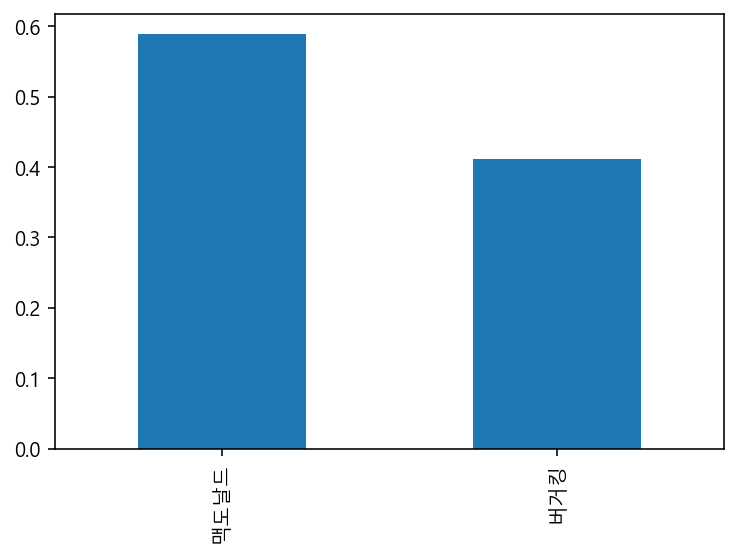

In [368]:
df_burger['브랜드명'].value_counts(normalize=True).plot.bar()

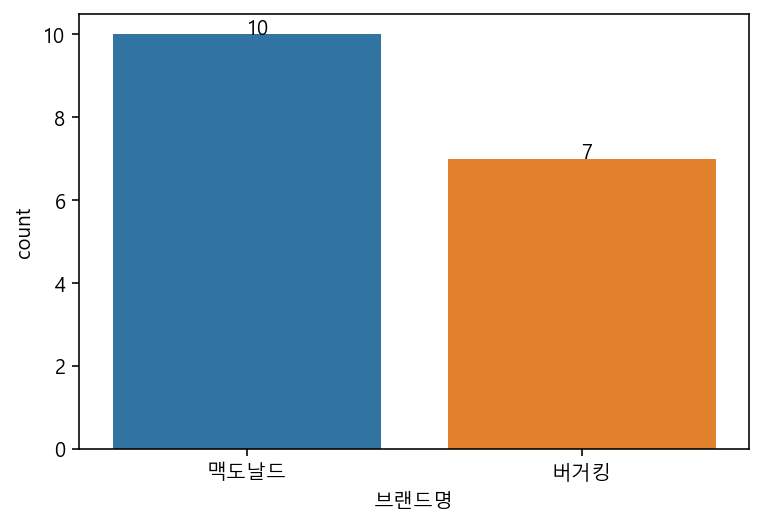

In [369]:
g = sns.countplot(data = df_burger, x = '브랜드명')
for i, val in enumerate(brand_count.index):
    g.text(x=i, y=brand_count[i], s=brand_count[i])
    

In [377]:
df_burger.head(1)

상가업소번호   상호명    지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
26067  25923114  맥도날드  부천원종점         Q       음식       Q07    패스트푸드    Q07A04   

      상권업종소분류명 표준산업분류코드     표준산업분류명  시도코드  시도명  시군구코드 시군구명       행정동코드  행정동명  \
26067    패스트푸드   I56199  그외 기타 음식점업    41  경기도  41190  부천시  4119084000  원종1동   

              법정동코드 법정동명  ...          도로명  건물본번지 건물부번지  \
26067  4.119012e+09  원종동  ...  경기도 부천시 소사로    754   NaN   

                          건물관리번호  건물명            도로명주소     구우편번호    신우편번호  \
26067  4119910400102800012003868  NaN  경기도 부천시 소사로 754  421200.0  14424.0   

       동정보  층정보  호정보          경도         위도    도   시군   구읍면   동리 상호명_소문자  브랜드명  
26067  NaN  NaN  NaN  126.805188  37.523256  경기도  부천시  None  원종동    맥도날드  맥도날드  

[1 rows x 45 columns]

### Marker

In [395]:
lat=df_burger['위도'].mean()
long=df_burger['경도'].mean()

m = folium.Map(location=[lat,long], zoom_start = 13)


for i in df_burger.index:
    lat = df_burger.loc[i,'위도']
    long = df_burger.loc[i,'경도']
    tooltip = df_burger.loc[i,'상호명'] + ' - ' + df_burger.loc[i,'도로명주소']
    folium.CircleMarker([lat,long],tooltip = tooltip).add_to(m)
    
    icon_color = 'green'
    
    if df_burger.loc[i,'브랜드명'] == '맥도날드':
        icon_color = 'red'
    
    folium.CircleMarker([lat,long], radius = 3 , color = icon_color, popup=f'<i>{title}<i>', tooltip=title).add_to(m)
    
m    


### Maker Cluster

In [392]:
lat=df_burger['위도'].mean()
long=df_burger['경도'].mean()
m = folium.Map(location=[lat,long], zoom_start = 13, tiles = 'stamen toner')

marker_cluster = MarkerCluster().add_to(m)

for i in df_burger.index:
    lat = df_burger.loc[i,'위도']
    long = df_burger.loc[i,'경도']
    title = df_burger.loc[i,'상호명'] + ' - ' + df_burger.loc[i,'도로명주소']
    icon_color = 'blue'
    
    if df_burger.loc[i,'브랜드명'] == '맥도날드':
        icon_color = 'red'
        
    folium.CircleMarker([lat,long],popup = f'<i>{title}<i>',color = icon_color, tooltip = title).add_to(marker_cluster)
    
m  

### heatmap

In [398]:
heat = df_burger[['위도','경도','브랜드명']].copy() # 브랜드 명도 숫자로 변경해줘야 함.
# 원본에 영향을 주지 않기 위해 copy( ) 사용

In [401]:
heat['브랜드명'] = heat['브랜드명'].replace('버거킹',1).replace('맥도날드',2)
heat.values # 모두 숫자로 만듦

array([[ 37.52325622, 126.80518846,   2.        ],
       [ 37.48402908, 126.78263425,   2.        ],
       [ 37.4674055 , 126.82361117,   1.        ],
       [ 37.49821614, 126.77698692,   1.        ],
       [ 37.50431185, 126.75501401,   2.        ],
       [ 37.51776988, 126.80439361,   2.        ],
       [ 37.48368131, 126.80951636,   2.        ],
       [ 37.48368131, 126.80951636,   2.        ],
       [ 37.50430493, 126.76207154,   1.        ],
       [ 37.50219647, 126.77416244,   2.        ],
       [ 37.48360376, 126.77461328,   2.        ],
       [ 37.51776988, 126.80439361,   2.        ],
       [ 37.5063838 , 126.75412002,   1.        ],
       [ 37.48669629, 126.7826475 ,   1.        ],
       [ 37.51964522, 126.80451074,   1.        ],
       [ 37.48912029, 126.75243929,   1.        ],
       [ 37.48554797, 126.78225908,   2.        ]])

In [404]:
from folium.plugins import HeatMap

lat=df_burger['위도'].mean()
long=df_burger['경도'].mean()

m = folium.Map([lat, long], tiles='stamentoner', zoom_start=12)


for i in df_burger.index:
    sub_lat = df_burger.loc[i, "위도"]
    sub_long = df_burger.loc[i, "경도"]
    
    title = df_burger.loc[i, "상호명"] + " - " + df_burger.loc[i, "도로명주소"]
    
    icon_color = "red"
    if df_burger.loc[i, "브랜드명"] == "버거킹":
        icon_color = "green"

    folium.CircleMarker(
        [sub_lat,sub_long ], 
        radius=3,
        color=icon_color,
        popup=f'<i>{title}</i>', 
        tooltip=title).add_to(m)

    
HeatMap(heat).add_to(m)

m.save('Heatmap.html')
m

In [406]:
df_g['상권업종소분류명'].unique()

array(['홍어전문', '한식/백반/한정식', '학습지보급', '화장품판매점', '정통양식/경양식', '운동/경기용품',
       '부대찌개/섞어찌개', '건축백화점', '핸드폰소매', '자동차정비/카센타', '식자재판매', '도서/만화대여',
       '발/네일케어', '주택수리종합', '청과물소매', '남성미용실', '꽃집/꽃배달', '편의점', '일반의류',
       '피아노/바이올린/기타', '자동차부품판매', '남성의류전문점', '갈비/삼겹살', '소주방/포장마차', '호프/맥주',
       '사무/문구용품', '배관난방보일러', '건강식품판매', '학원-입시', '비만/피부관리', '떡전문',
       '학원-외국어/어학', '곱창/양구이전문', '횟집', '상가분양', '악기판매', '족발/보쌈전문', '추어탕전문',
       '캠프/별장/펜션', '모텔/여관/여인숙', '컴퓨터/사무용기기종합', '여성미용실', '스낵', '자전거판매',
       '수퍼마켓', '건강원', '부동산중개', '후라이드/양념치킨', '재활용/고물수집', '서점',
       '커피전문점/카페/다방', '국수/만두/칼국수', '독서실', '식료품점', '노래방', '여성의류전문점',
       '중국음식/중국집', '욕탕업-종합', '라면김밥분식', '아구전문', '의료용품소매', '학원-배우/탤런트',
       '복권판매', '생과일주스전문점', '안경원', '지물판매', '청소/소독', '해장국/감자탕', '컴퓨터/주변기기',
       '호텔/콘도', '인쇄종합', '학원-기타', '육류소매', '타이어판매', '패밀리레스토랑', '종합소매',
       '태권도장', '세탁소/빨래방', '조명기구/전기용품', '룸살롱/단란주점', '설렁탕집', '여성내의전문점',
       '생활용품판매', '종합부페', '보일러/냉난방용품', '빠/카페/스탠드빠', '당구장', '유리/페인트/철물건축자재',
       '철물/건설자재